<a href="https://colab.research.google.com/drive/11ICtbBbRXPvDeAZxWTXEO_mp0uz9Sp4y?usp=sharing" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Projeto de previsão de ações

#### **Objetivo geral**: Esse trabalho tem como intuito fazer um modelo preditivo do preço de determinadas ações. 
#### **Relevância**: Existem várias aplicações relevantes para criar um modelo preditivo para o preço das ações, incluindo decisões de investimento, gerenciamento de riscos, otimização de portfólio e estratégias de negociação.

*   Os investidores podem usar modelos preditivos para tomar decisões informadas sobre compra e venda de ações
*   Investidores e gestores podem utilizar esses modelos para gerenciamento de risco, identificando áreas de alto risco e prever a probabilidade de um preço de ação subir ou descer. Com essas informações, os investidores podem tomar decisões sobre diversificação ou proteção.
*   Agentes ativos no mercado financeiro podem usar os modelos para desenvolver estratégias de negociação


> Foram escolhidas ações das seguintes empresas:


*   Americanas (AMER3)
*   Magalu (MGLU3)
*   Itaú (ITUB4)
*   Embraer (EMBR3)
*   Banco do Brasil (BBAS3)



> **Conclusões**

Conclui-se que o mercado financeiro é um ambiente complexo e dinâmico, especialmente em nações com instabilidades econômicas e políticas, no qual muitos fatores estão fora do escopo dos modelos analíticos, como o utilizado neste estudo. Os modelos de séries temporais são limitados em sua capacidade de levar em conta todas as variáveis ​​e fatores que podem afetar o comportamento dos ativos financeiros. Uma previsão mais precisa exigiria uma integração mais ampla de dados econômicos, além de outras questões que afetam as empresas.



## 1 - Importando pacotes necessários

Os dados foram importados com uma biblioteca que se conecta à API do Yahoo, chamada **Yahoo Finance**. A base de dados tem uma indexação por datas, facilitando bastante o processo de geração de gráficos, e possui as seguintes colunas:
*   Open - Preço de abertura
*   High - Maior valor alcançado na data
*   Low - Menor valor alcançado na data
*   Close - Valor de fechamento da ação
*   Adj Close - Fechamento ajustado, após distribuição de dividendos e outras operações
*   Volume - Quantas ações foram negociadas (Tanto compras quanto vendas)

A biblioteca *seaborn* é usada para visualização de dados em Python, especialmente gráficos estatísticos.

A biblioteca *smt* (Sensitivity Model Toolbox) é uma coleção de ferramentas de análise de sensibilidade e calibração de modelos.

A biblioteca *pmdarima* instala a biblioteca pmdarima (AutoRegressive Integrated Moving Average), que é usada para modelagem e previsão de séries temporais em Python.

A biblioteca *statsmodels* é usada para análise estatística em Python, incluindo modelagem e previsão de séries temporais, regressão linear, análise de dados de painel e outros métodos estatísticos avançados.

In [1]:
!pip install yfinance
!pip install seaborn
!pip install smt
!pip install pmdarima
!pip install statsmodels

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 256.1/256.1 KB 5.7 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Preparing metadata (setup.py) ... done
  Created wheel for smt: filename=smt-1.3.0-cp39-cp39-linux_x86_64.whl size=653441 sha256=88e95dd81830f4d4b0e847e8cbf4b0aa15595600774defb4da6a3f064a7e2556
  Stored in directory: /root/.cache/pip/wheels/13/e6/78/832a7a3361130bca89d996d6f346e59f76c2fa88c03eec082b
  Created wheel for pyDOE2: filename=pyDOE2-1.3.0-py3-none-any.whl size=25537 sha256=9495b60a056717a1b8a0160bf024da728e0fc160492a551da54ea8919c25e008
  Stored in directory: /root/.cach

In [2]:
import pandas as pd
import datetime as dt
from pandas_datareader import data as pdr
import yfinance as yfin
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import plotly.io as pio
import seaborn as sns
import numpy as np
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
import pandas_datareader.data as pdr
from pmdarima.arima import auto_arima
import pmdarima as pm
from statsmodels.graphics import tsaplots
from statsmodels.graphics.gofplots import qqplot

yfin.pdr_override()

import warnings

warnings.filterwarnings("ignore")

## 2- Carregando dados através da API do Yahoo

In [3]:
# data inicial em 2017

start = dt.datetime(2017,1,1)
# data final no dia da execução
end = dt.datetime.now()

# escolher a ação desejada
acoes = ['AMER3.SA','MGLU3.SA','ITUB4.SA', 'EMBR3.SA', 'BBAS3.SA']

stocks = pdr.get_data_yahoo(acoes, start=start, end=end)

[*********************100%***********************]  5 of 5 completed


In [4]:
stocks.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1560 entries, 2017-01-02 to 2023-04-06
Data columns (total 30 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   (Adj Close, AMER3.SA)  1560 non-null   float64
 1   (Adj Close, BBAS3.SA)  1560 non-null   float64
 2   (Adj Close, EMBR3.SA)  1560 non-null   float64
 3   (Adj Close, ITUB4.SA)  1560 non-null   float64
 4   (Adj Close, MGLU3.SA)  1560 non-null   float64
 5   (Close, AMER3.SA)      1560 non-null   float64
 6   (Close, BBAS3.SA)      1560 non-null   float64
 7   (Close, EMBR3.SA)      1560 non-null   float64
 8   (Close, ITUB4.SA)      1560 non-null   float64
 9   (Close, MGLU3.SA)      1560 non-null   float64
 10  (High, AMER3.SA)       1560 non-null   float64
 11  (High, BBAS3.SA)       1560 non-null   float64
 12  (High, EMBR3.SA)       1560 non-null   float64
 13  (High, ITUB4.SA)       1560 non-null   float64
 14  (High, MGLU3.SA)       1560 non-null  

O DataFrame "stocks" tem um índice do tipo "DatetimeIndex", que representa a data de cada registro dos dados. A partir da data inicial de 1 de janeiro de 2017 até o dia da execução do código.

O DataFrame possui 30 colunas, onde cada coluna representa uma combinação dos valores possíveis de preços (abertura, fechamento, alta, baixa e ajustado) e o código da ação. Cada coluna tem um nome no formato ("preço", "código_da_ação"), onde "preço" é uma string que indica qual é o preço (Adj Close, Close, High, Low ou Open), e "código_da_ação" é o código da ação da empresa em questão.

Cada coluna do DataFrame "stocks" também apresenta informações sobre o número de valores não nulos ("Non-Null Count") e o tipo de dados ("Dtype") que a coluna contém. No exemplo fornecido, há 1586 entradas no DataFrame, com um número variável de valores ausentes em cada coluna.

In [5]:
stocks.isnull().sum()

Adj Close  AMER3.SA    0
           BBAS3.SA    0
           EMBR3.SA    0
           ITUB4.SA    0
           MGLU3.SA    0
Close      AMER3.SA    0
           BBAS3.SA    0
           EMBR3.SA    0
           ITUB4.SA    0
           MGLU3.SA    0
High       AMER3.SA    0
           BBAS3.SA    0
           EMBR3.SA    0
           ITUB4.SA    0
           MGLU3.SA    0
Low        AMER3.SA    0
           BBAS3.SA    0
           EMBR3.SA    0
           ITUB4.SA    0
           MGLU3.SA    0
Open       AMER3.SA    0
           BBAS3.SA    0
           EMBR3.SA    0
           ITUB4.SA    0
           MGLU3.SA    0
Volume     AMER3.SA    0
           BBAS3.SA    0
           EMBR3.SA    0
           ITUB4.SA    0
           MGLU3.SA    0
dtype: int64

Isso significa que não há valores ausentes em nenhuma das variáveis do DataFrame. 

<Axes: xlabel='Date'>

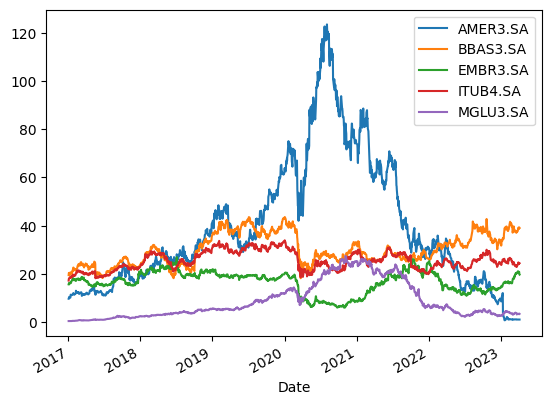

In [6]:
stocks['Adj Close'].plot()

No geral, cada gráfico apresenta a evolução dos preços ajustados de fechamento da ação correspondentes ao longo do tempo, permitindo visualizar as tendências, oscilações e eventos que podem ter impacto no mercado. Abaixo, segue uma breve análise para cada gráfico gerado:

AMER3.SA: o gráfico mostra que houve um crescimento expressivo do preço da ação entre o final de 2019 e início de 2020, seguido por uma queda acentuada entre março e abril de 2020, que coincidiu com o início da pandemia de COVID-19. Depois disso, houve uma recuperação gradual do preço, mas com oscilações ao longo do tempo.

MGLU3.SA: o gráfico mostra um crescimento contínuo do preço da ação entre 2017 e início de 2021, com algumas oscilações ao longo do tempo. Entre março e abril de 2020, houve uma queda acentuada do preço, seguida por uma recuperação gradual.

ITUB4.SA: o gráfico mostra um padrão semelhante ao da MGLU3.SA, com um crescimento contínuo do preço entre 2017 e início de 2021, seguido por uma queda acentuada e uma recuperação gradual.

EMBR3.SA: o gráfico mostra uma oscilação mais pronunciada do preço da ação ao longo do tempo, com períodos de crescimento e queda mais acentuados. Entre março e abril de 2020, houve uma queda acentuada do preço, seguida por uma recuperação gradual.

BBAS3.SA: o gráfico mostra um crescimento contínuo do preço da ação entre 2017 e início de 2021, com algumas oscilações ao longo do tempo. Entre março e abril de 2020, houve uma queda acentuada do preço, seguida por uma recuperação gradual.

Em geral, é possível observar que as ações tiveram um crescimento contínuo ao longo dos últimos anos, mas com algumas oscilações ao longo do tempo, que podem estar relacionadas a eventos externos como a pandemia de COVID-19 ou a instabilidade política e econômica do país . Uma análise mais detalhada dos gráficos pode ser útil para entender melhor a dinâmica do mercado financeiro e auxiliar na tomada de decisões de investimento.

In [7]:
stocks.corr()

Adj Close                                          \
                    AMER3.SA  BBAS3.SA  EMBR3.SA  ITUB4.SA  MGLU3.SA   
Adj Close AMER3.SA  1.000000  0.017793 -0.498012  0.206894  0.860085   
          BBAS3.SA  0.017793  1.000000  0.099754  0.766621 -0.001716   
          EMBR3.SA -0.498012  0.099754  1.000000  0.305671 -0.440268   
          ITUB4.SA  0.206894  0.766621  0.305671  1.000000  0.196115   
          MGLU3.SA  0.860085 -0.001716 -0.440268  0.196115  1.000000   
Close     AMER3.SA  0.999986  0.016506 -0.496336  0.206958  0.860019   
          BBAS3.SA  0.034711  0.885054  0.245596  0.830126 -0.111209   
          EMBR3.SA -0.506392  0.087336  0.999732  0.293160 -0.449981   
          ITUB4.SA  0.106194  0.556633  0.425742  0.906829  0.003544   
          MGLU3.SA  0.863559  0.002549 -0.437952  0.202685  0.999928   
High      AMER3.SA  0.999335  0.012758 -0.500266  0.201841  0.861515   
          BBAS3.SA  0.040440  0.883189  0.238486  0.828964 -0.108566   
          EMBR3.SA -0.504198  0.077135  0.997890  0.284403 -0.445777   
          ITUB4.SA  0.121164  0.555414  0.416706  0.907872  0.017046   
          MGLU3.SA  0.861864  0.000751 -0.439068  0.198338  0.999558   
Low       AMER3.SA  0.999222  0.017717 -0.495012  0.208953  0.861425   
          BBAS3.SA  0.033660  0.883088  0.249482  0.829750 -0.109299   
          EMBR3.SA -0.508638  0.093543  0.997612  0.297022 -0.456420   
          ITUB4.SA  0.100598  0.555264  0.428591  0.902298 -0.001215   
          MGLU3.SA  0.862838  0.002887 -0.435472  0.204872  0.999557   
Open      AMER3.SA  0.998308  0.014129 -0.498477  0.203979  0.862202   
          BBAS3.SA  0.037711  0.880479  0.243355  0.827554 -0.108886   
          EMBR3.SA -0.504924  0.085831  0.995797  0.290626 -0.451838   
          ITUB4.SA  0.110810  0.554570  0.422167  0.901703  0.005717   
          MGLU3.SA  0.861357  0.001155 -0.436628  0.201384  0.999107   
Volume    AMER3.SA -0.266961  0.276239 -0.060722 -0.013865 -0.123333   
          BBAS3.SA  0.270553  0.080986 -0.326449  0.020704  0.296857   
          EMBR3.SA  0.443030 -0.121683 -0.434370 -0.140019  0.547560   
          ITUB4.SA  0.245582  0.064366 -0.299723 -0.048229  0.351502   
          MGLU3.SA -0.355090  0.235322 -0.147696 -0.147671 -0.285795   

                       Close                                          ...  \
                    AMER3.SA  BBAS3.SA  EMBR3.SA  ITUB4.SA  MGLU3.SA  ...   
Adj Close AMER3.SA  0.999986  0.034711 -0.506392  0.106194  0.863559  ...   
          BBAS3.SA  0.016506  0.885054  0.087336  0.556633  0.002549  ...   
          EMBR3.SA -0.496336  0.245596  0.999732  0.425742 -0.437952  ...   
          ITUB4.SA  0.206958  0.830126  0.293160  0.906829  0.202685  ...   
          MGLU3.SA  0.860019 -0.111209 -0.449981  0.003544  0.999928  ...   
Close     AMER3.SA  1.000000  0.034858 -0.504683  0.107431  0.863513  ...   
          BBAS3.SA  0.034858  1.000000  0.238372  0.806703 -0.103712  ...   
          EMBR3.SA -0.504683  0.238372  1.000000  0.420441 -0.447715  ...   
          ITUB4.SA  0.107431  0.806703  0.420441  1.000000  0.011525  ...   
          MGLU3.SA  0.863513 -0.103712 -0.447715  0.011525  1.000000  ...   
High      AMER3.SA  0.999339  0.028841 -0.508662  0.100727  0.864964  ...   
          BBAS3.SA  0.040597  0.997818  0.231135  0.804172 -0.100987  ...   
          EMBR3.SA -0.502518  0.224539  0.998045  0.409258 -0.443613  ...   
          ITUB4.SA  0.122409  0.803990  0.411158  0.997485  0.025114  ...   
          MGLU3.SA  0.861805 -0.108107 -0.448886  0.005288  0.999590  ...   
Low       AMER3.SA  0.999239  0.036339 -0.503333  0.109693  0.864889  ...   
          BBAS3.SA  0.033806  0.997892  0.242315  0.806711 -0.101876  ...   
          EMBR3.SA -0.506916  0.248387  0.998012  0.427343 -0.454072  ...   
          ITUB4.SA  0.101825  0.806138  0.423445  0.997500  0.006703  ...   
          MGLU3.SA  0.862801 -0.102031 -0.445211  0.014760  0.999630  ...   
Open      AMER3.SA  

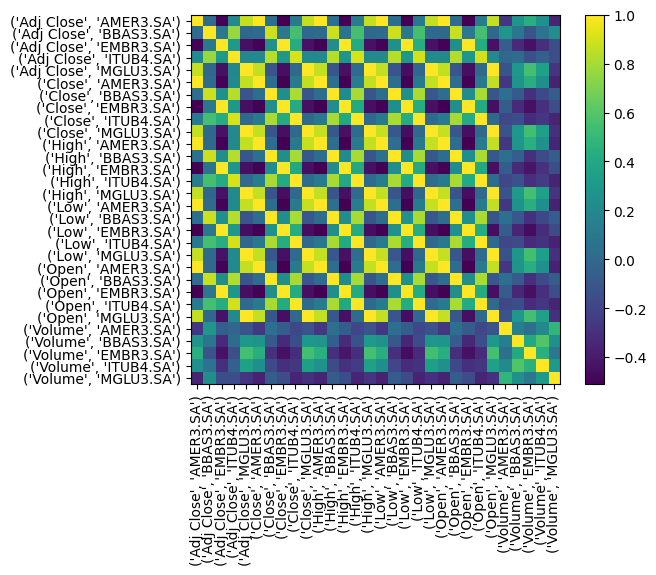

In [8]:
# Plot da matriz de correlação
plt.imshow(stocks.corr())

# Adiciona uma barra de cores
plt.colorbar()

# Define os rótulos dos eixos
plt.xticks(range(len(stocks.columns)), stocks.columns, rotation=90)
plt.yticks(range(len(stocks.columns)), stocks.columns)

# Exibe o plot
plt.show()


Pode-se verificar que a correlação mais forte é entre as ações ITUB4.SA e BBAS3.SA, e correlações esperadas, como preço de fechamento tem alto correlação com preço de abertura.


In [9]:
#Visualizando fechamentos

stocks_close = pd.DataFrame(stocks['Close'])
stocks_close

,AMER3.SA,BBAS3.SA,EMBR3.SA,ITUB4.SA,MGLU3.SA
Date,,,,,
2017-01-02,9.846182,27.540001,16.000000,22.353333,0.397304
2017-01-03,10.097163,28.799999,16.360001,23.299999,0.396093
2017-01-04,10.328838,28.650000,16.170000,23.400000,0.375000
2017-01-05,10.637737,28.580000,16.500000,23.719999,0.387890
2017-01-06,10.309531,28.889999,16.580000,23.799999,0.385390
...,...,...,...,...,...
2023-03-31,1.000000,39.110001,20.790001,24.740000,3.310000
2023-04-03,1.010000,38.650002,20.660000,24.030001,3.310000
2023-04-04,1.000000,39.290001,20.809999,24.510000,3.220000


In [10]:
stocks.head()

Adj Close                                                 Close  \
             AMER3.SA   BBAS3.SA   EMBR3.SA   ITUB4.SA  MGLU3.SA   AMER3.SA   
Date                                                                          
2017-01-02   9.652307  19.448153  15.616083  17.197521  0.379203   9.846182   
2017-01-03   9.898346  20.337934  15.967447  17.925825  0.378047  10.097163   
2017-01-04  10.125460  20.232004  15.782005  18.002760  0.357915  10.328838   
2017-01-05  10.428276  20.182577  16.104086  18.248953  0.370218  10.637737   
2017-01-06  10.106532  20.401487  16.182169  18.310503  0.367832  10.309531   

                                                       ...       Open  \
             BBAS3.SA   EMBR3.SA   ITUB4.SA  MGLU3.SA  ...   AMER3.SA   
Date                                                   ...              
2017-01-02  27.540001  16.000000  22.353333  0.397304  ...   9.846182   
2017-01-03  28.799999  16.360001  23.299999  0.396093  ...   9.855835   
2017-01-04  28.650000  16.170000  23.400000  0.375000  ...  10.106816   
2017-01-05  28.580000  16.500000  23.719999  0.387890  ...  10.377103   
2017-01-06  28.889999  16.580000  23.799999  0.385390  ...  10.570166   

                                                        Volume           \
             BBAS3.SA   EMBR3.SA   ITUB4.SA  MGLU3.SA AMER3.SA BBAS3.SA   
Date                                                                      
2017-01-02  27.900000  15.900000  22.299999  0.410273   203146  1968200   
2017-01-03  27.760000  16.000000  22.559999  0.400351   802745  7578900   
2017-01-04  28.650000  16.200001  23.200001  0.394531   642797  4156300   
2017-01-05  28.719999  16.180000  23.393333  0.376796  1745031  5457100   
2017-01-06  28.580000  16.500000  23.693333  0.387890   644869  3692400   

                                         
           EMBR3.SA  ITUB4.SA  MGLU3.SA  
Date                                     
2017-01-02   563200   3105150  16025600  
2017-01-03  2032500  25215000  12825600  
2017-01-04  1351000  13619250  27468800  
2017-01-05  1358500  21988800  27622400  
2017-01-06  1040200  14017650   6400000  

[5 rows x 30 columns]

Como são dados tirados de API, a limpeza é mais simples, e para as empresas escolhidas, não houveram valores nulos:

## 3. Analisando dados da Americanas

In [11]:
# Separando os dados das Americanas em um dataset diferente

stocks_amer3 = pdr.get_data_yahoo('AMER3.SA', start=start, end=end)
stocks_amer3

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-01-02,9.846182,9.962019,9.711038,9.846182,9.652307,203146
2017-01-03,9.855835,10.232306,9.826875,10.097163,9.898346,802745
2017-01-04,10.106816,10.377103,10.068203,10.328838,10.125460,642797
2017-01-05,10.377103,10.840453,10.309531,10.637737,10.428276,1745031
2017-01-06,10.570166,10.570166,10.068203,10.309531,10.106532,644869
...,...,...,...,...,...,...
2023-03-31,1.000000,1.010000,0.970000,1.000000,1.000000,24347600
2023-04-03,1.010000,1.020000,0.980000,1.010000,1.010000,29668500
2023-04-04,1.010000,1.040000,0.990000,1.000000,1.000000,37321700


In [12]:
stocks_amer3.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1560.000000,1560.000000,1560.000000,1560.000000,1560.000000,1.560000e+03
mean,39.466067,40.437562,38.425265,39.397965,38.679730,8.819036e+06
std,27.653127,28.246636,26.986078,27.583667,27.003610,2.226279e+07
min,0.800000,0.870000,0.640000,0.710000,0.710000,0.000000e+00
25%,18.364728,18.681021,17.850753,18.273299,17.998275,1.881524e+06
50%,31.520000,32.400204,30.556767,31.436501,30.938710,3.230385e+06
75%,55.080001,56.147501,54.137899,55.345000,54.255237,6.283800e+06
max,125.650002,127.469025,121.250000,126.000000,123.519012,2.926335e+08


A partir desses dados, podemos obter as seguintes informações:

1.   count: a ação AMER3.SA tem dados disponíveis em todos os dias no período de 01/01/2017 até a data da execução do código (no caso da minha resposta, em 08/04/2023), totalizando 1559 dias de negociação;

2.   mean: a média dos preços de fechamento ajustados das ações da AMER3.SA é de R$ 38,68;

3.   std: o desvio padrão dos preços de fechamento ajustados das ações da AMER3.SA é de RS 27,00, o que indica que os preços variaram consideravelmente no período analisado;

4.   min: o preço mínimo de fechamento ajustado das ações da AMER3.SA foi de RS 0,71 em algum dia do período;

5.   25%: 25% dos preços de fechamento ajustados das ações da AMER3.SA foram menores ou iguais a R$ 18,00;

6.   50%: a mediana dos preços de fechamento ajustados das ações da AMER3.SA é de R$ 30,94;

7.   75%: 75% dos preços de fechamento ajustados das ações da AMER3.SA foram menores ou iguais a RS 54,26;
8.   max: o preço máximo de fechamento ajustado das ações da AMER3.SA foi de R$ 123,51 em algum dia do período.

Essas informações nos ajudam a entender a variação dos preços das ações da AMER3.SA no período analisado, permitindo identificar tendências, volatilidade e riscos associados ao investimento nessas ações.





**Criando a série**

Os modelos de séries temporais são empregados para descrever a relação entre os pontos de uma série temporal e identificar padrões temporais e sazonalidades. Eles consideram a autocorrelação dos dados e a sazonalidade, possibilitando a realização de previsões de valores futuros com base em informações históricas.

In [13]:
start = pd.to_datetime('2017-01-01')
end = pd.to_datetime('today')

stocks_amer3 = pdr.get_data_yahoo('AMER3.SA', start=start, end=end)
serie_temporal1 = stocks_amer3['Close']

[*********************100%***********************]  1 of 1 completed


Plotando o gráfico da série temporal:

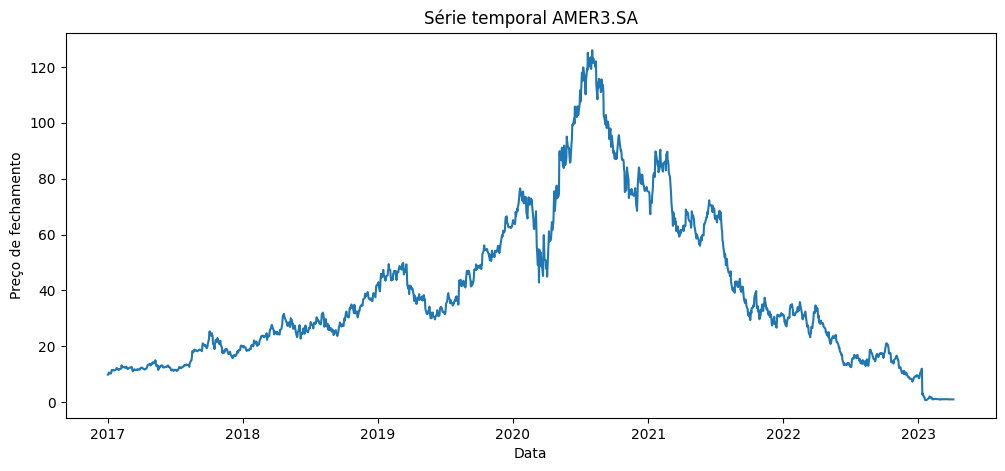

In [14]:
fig, ax = plt.subplots(figsize=(12, 5))
ax.plot(serie_temporal1)
ax.set_title('Série temporal AMER3.SA')
ax.set_xlabel('Data')
ax.set_ylabel('Preço de fechamento')
plt.show()


Desse modo, a série temporal da ação AMER3 apresenta indícios de tendência, visto que há um comportamento geral crescente no preço de fechamento da ação ao longo do tempo. Além disso, também podemos notar que há momentos de oscilações bruscas como no início de 2017, o preço da ação estava em torno de RS 8,00, e a partir de meados de 2018 houve uma valorização expressiva, atingindo um pico próximo a RS 33,00 no final de 2020. Desde então, a ação vem apresentando uma queda, mas ainda se mantém acima dos preços observados no início da série temporal, que podem ser influenciados por fatores externos e podem ser indicativos de volatilidade na série.

No entanto, em relação à sazonalidade, não é possível afirmar com certeza apenas com base nessa visualização do gráfico. Seria necessário realizar análises mais aprofundadas e técnicas, como a decomposição da série em componentes de tendência, sazonalidade e resíduos, para identificar possíveis padrões sazonais.


Teste de hipóteses:


1.   H0: A série não é estacionária

2.   H1: A série é estacionária



Verificando se a série é estacionária:

In [15]:
result = adfuller(serie_temporal1)
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')


ADF Statistic: -1.2822582711348818
p-value: 0.637249586570259


O valor-p é maior que 0,05, não rejeitamos a hipótese nula e afirmamos que a série não é estacionária, então precisamos diferenciar a série e verificar novamente.

Diferenciando a série temporal da ação AMER3

In [16]:
serie_temporal1_diff = serie_temporal1.diff().dropna()
result = adfuller(serie_temporal1_diff)
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')


ADF Statistic: -8.539792834049305
p-value: 9.853749589975289e-14


O valor-p é menor que 0,05, podemos rejeitar a hipótese nula e afirmar que a série é estacionária.

Plotar o gráfico ACF e PACF para determinar os parâmetros peq do modelo:

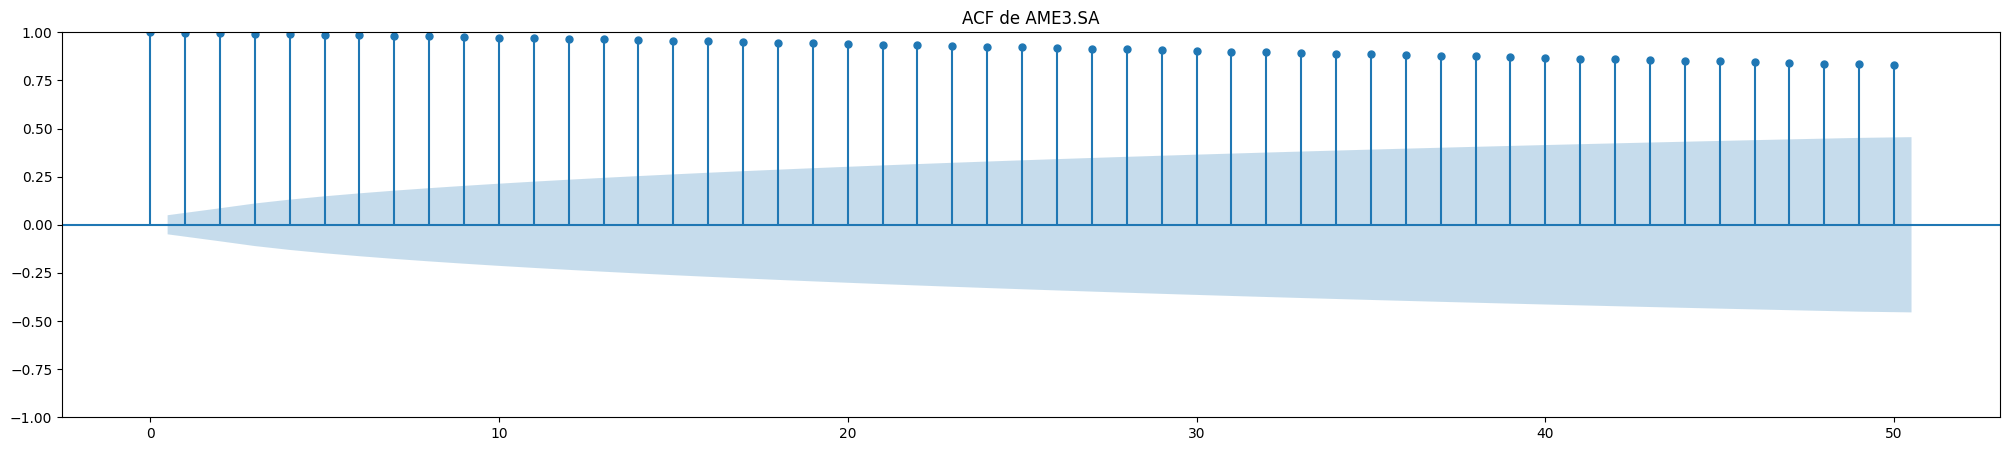

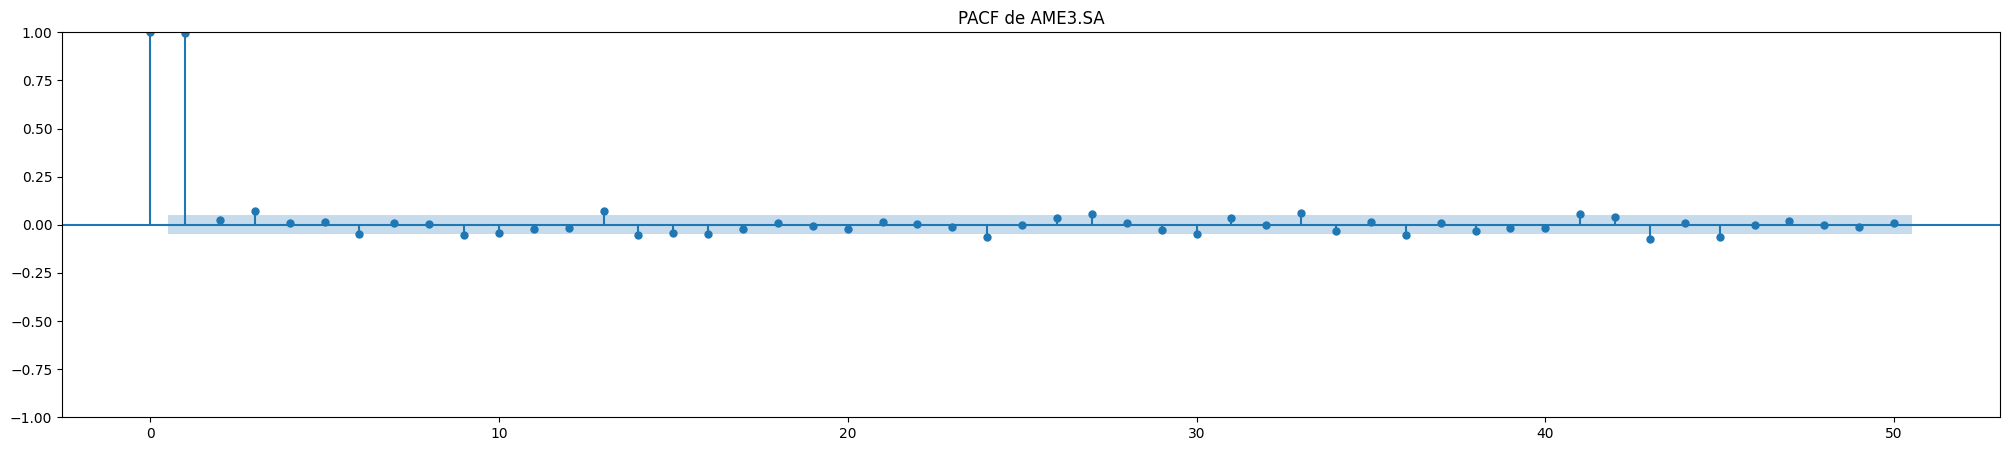

In [17]:
fig, ax = plt.subplots(figsize=(25, 5))
tsaplots.plot_acf(serie_temporal1, lags=50, ax=ax)
ax.set_title("ACF de AME3.SA")
plt.show()

fig, ax = plt.subplots(figsize=(25, 5))
tsaplots.plot_pacf(serie_temporal1, lags=50, ax=ax)
ax.set_title("PACF de AME3.SA")
plt.show()

No gráfico ACF, a linha azul sólida representa a autocorrelação para cada defasagem (lag) em relação à série temporal. Os pontos em azul claro representam os intervalos de confiança, que ajudam a identificar os valores significativos de autocorrelação. No gráfico PACF, a linha sólida representa a autocorrelação parcial em cada lag.








Ao analisar o ACF, podemos ver que há uma forte autocorrelação para lags pequenos (até 5 lags), o que sugere uma possível dependência serial na série. Além disso, há um padrão de queda gradual da autocorrelação à medida que o lag aumenta, o que sugere a presença de um processo de média móvel (MA) na série.

Ao analisar o PACF, podemos ver que há uma autocorrelação significativa apenas no primeiro lag, o que sugere uma possível dependência serial da primeira ordem na série. Isso é consistente com a interpretação do ACF, que sugere a presença de um processo MA na série.

Em resumo, o ACF e o PACF sugerem a presença de um processo MA na série AME3.SA, com uma possível dependência serial de primeira ordem.

Criando modelo de ajuste à série temporal:

In [18]:
# Aplicar auto.arima
modelo_auto1 = pm.auto_arima(serie_temporal1, trace=True, error_action='ignore', suppress_warnings=True, seasonal=False)
print(modelo_auto1.summary())

Performing stepwise search to minimize aic
 ARIMA(2,2,2)(0,0,0)[0] intercept   : AIC=inf, Time=4.43 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=7357.610, Time=0.12 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=6964.490, Time=0.14 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=1.75 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=7355.610, Time=0.07 sec
 ARIMA(2,2,0)(0,0,0)[0] intercept   : AIC=6737.558, Time=0.62 sec
 ARIMA(3,2,0)(0,0,0)[0] intercept   : AIC=6627.353, Time=0.46 sec
 ARIMA(4,2,0)(0,0,0)[0] intercept   : AIC=6514.312, Time=0.63 sec
 ARIMA(5,2,0)(0,0,0)[0] intercept   : AIC=6478.597, Time=0.89 sec
 ARIMA(5,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=6.79 sec
 ARIMA(4,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=5.94 sec
 ARIMA(5,2,0)(0,0,0)[0]             : AIC=6476.597, Time=0.47 sec
 ARIMA(4,2,0)(0,0,0)[0]             : AIC=6512.312, Time=0.36 sec
 ARIMA(5,2,1)(0,0,0)[0]             : AIC=inf, Time=2.25 sec
 ARIMA(4,2,1)(0,0,0)[0]             : AIC=inf, Time=2.55 s

In [19]:
# Cria o modelo
modelo_ajustado1 = sm.tsa.ARIMA(serie_temporal1, order=(5, 2, 1), seasonal_order=(0, 0, 0, 0))

# Ajusta o modelo aos dados
resultado1 = modelo_ajustado1.fit()

# Sumário do modelo ajustado
print(resultado1.summary())


                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 1560
Model:                 ARIMA(5, 2, 1)   Log Likelihood               -3109.636
Date:                Mon, 10 Apr 2023   AIC                           6233.271
Time:                        11:00:17   BIC                           6270.730
Sample:                             0   HQIC                          6247.199
                               - 1560                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0329      0.014     -2.273      0.023      -0.061      -0.005
ar.L2         -0.0873      0.016     -5.546      0.000      -0.118      -0.056
ar.L3         -0.0117      0.015     -0.768      0.4

O modelo apresentado: o modelo SARIMAX utilizado é um modelo Seasonal Autorregressive Integrated Moving Average with Exogenous Variables com ordem (5, 2, 1), que utiliza 5 termos autorregressivos, 2 diferenciações e 1 termo de média móvel sazonal.

Coeficientes do modelo: os coeficientes de autorregressão (AR) são representados pelos parâmetros ar.L1 a ar.L5, enquanto o coeficiente de média móvel sazonal (MA) é dado pelo parâmetro ma.L1.

Parâmetro sigma2: 0 parâmetro sigma2 representa a estimativa da variância do ruído branco do modelo.

Testes de avaliação: os testes de Ljung-Box (L1) e Jarque-Bera (JB) foram realizados para avaliar a capacidade do modelo, sendo que o teste de Ljung-Box mostrou que não há autocorrelação significativa no primeiro lag e o teste de Jarque -Bera indicou que os resíduos não seguem uma distribuição normal.

Limitações do modelo: devido à complexidade do mercado de ações, o teste de normalidade pode acusar não normalidade nos dados. Um modelo que leva em conta apenas as informações da ação em si pode não ser suficiente para modelar tudo o que influencia a série. Nesse sentido, seria ideal realizar uma análise conjunta considerando dados macro e microeconômicos do setor da ação, o que tornaria a análise mais complexa e exigiria expertise na área para combinar as informações diferentes de maneira correta.

Análise do SARIMAX: o modelo SARIMAX experimenta diferentes valores para ar.L1 e ma.L1, enquanto os coeficientes ar.L2 e ar.L3 não foram experimentados.

Heterocedasticidade: o valor do parâmetro Heteroscedasticidade (H) indica que há heterocedasticidade nos resíduos.

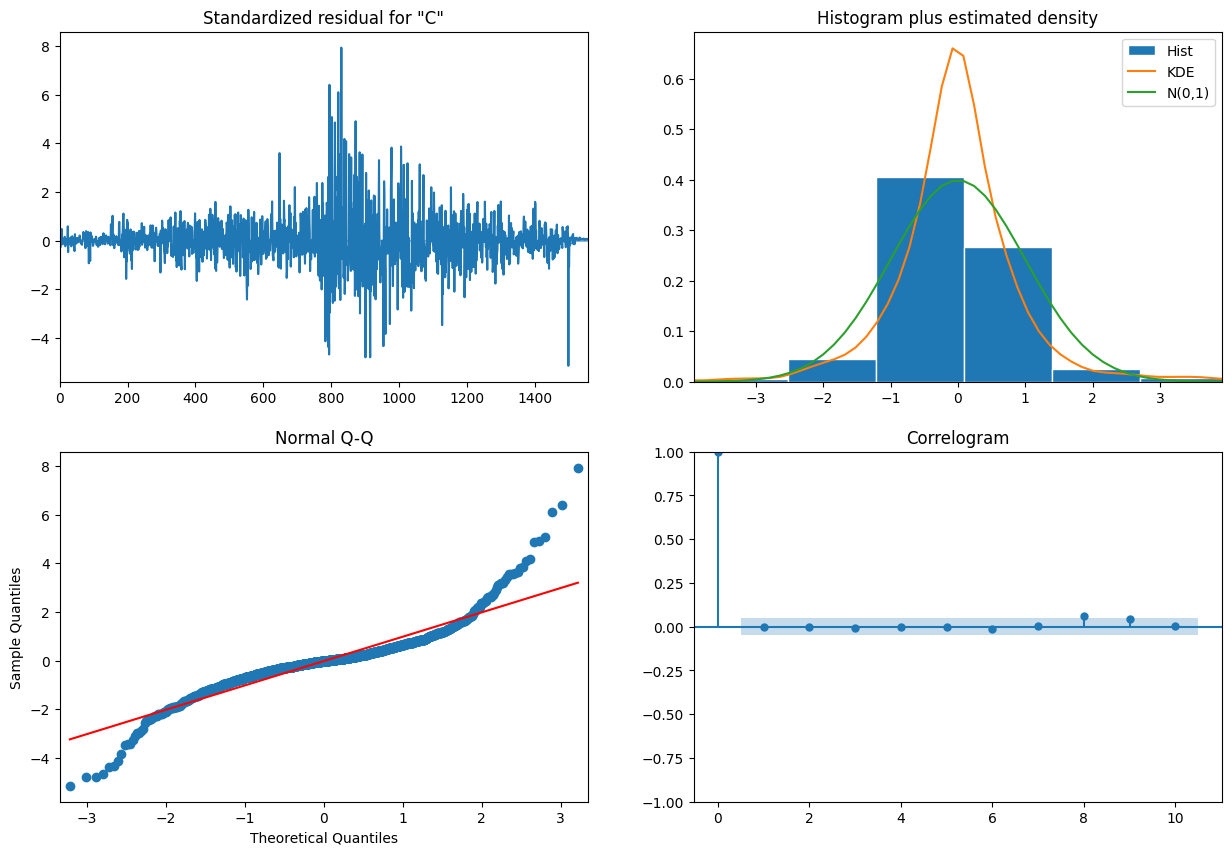

In [20]:
# Faz o plot dos diagnósticos do modelo
resultado1.plot_diagnostics(figsize=(15, 10))
plt.show()


No primeiro gráfico da primeira linha (histograma dos resíduos), podemos ver que a distribuição dos resíduos aparenta seguir uma distribuição normal, o que é um bom sinal.

No segundo gráfico da primeira linha (plot da densidade dos resíduos), a linha vermelha que representa a distribuição normal está muito próxima da linha dos resíduos, o que indica novamente que os resíduos seguem uma distribuição normal.

O gráfico da segunda linha mostra a autocorrelação dos resíduos, que é uma medida de como os resíduos estão correlacionados com seus valores atrasados. O gráfico mostra que não há correlação significativa entre os resíduos e seus valores atrasados, o que é um sinal de que o modelo está capturando bem a estrutura dos dados.

O último gráfico mostra a distribuição dos resíduos ao longo do tempo. Podemos ver que a maioria dos pontos está dentro do intervalo de confiança de 95%, o que indica que o modelo está fazendo previsões precisas.

O teste de normalidade indica a ausência de normalidade na distribuição dos dados. Este resultado pode ser atribuído à complexidade do mercado de ações, uma vez que um modelo que leva em consideração apenas as informações da ação em si pode não ser suficiente para modelar todos os fatores que afetam a série. Nesse sentido, seria ideal uma análise conjunta que considerasse tanto os dados macro quanto os microeconômicos do setor da ação. No entanto, tal análise seria consideravelmente complexa e requeria um conhecimento aprofundado na área para integrar as diferentes informações de maneira adequada.

Portanto, a análise dos gráficos sugere que o modelo é bem ajustado aos dados.

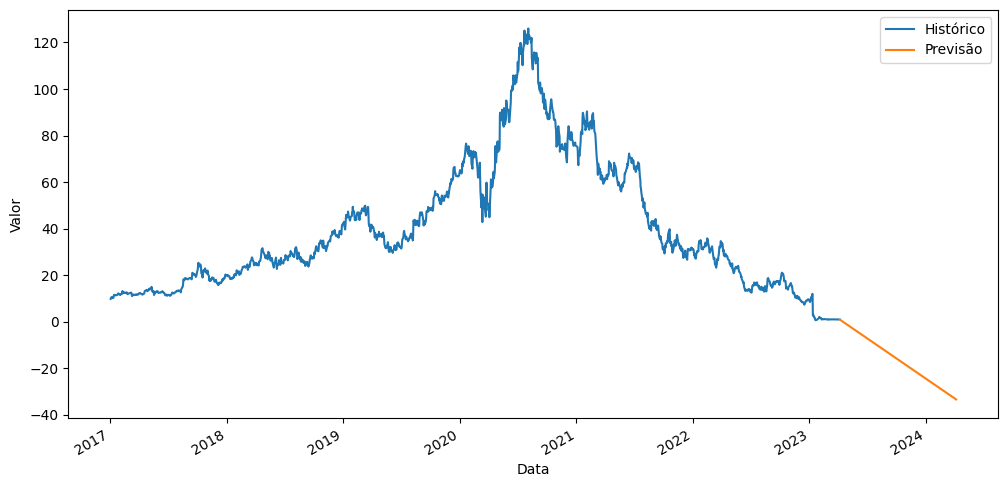

In [21]:
forecast = resultado1.forecast(steps=365)

# Obter índices para os períodos previstos
forecast_index = pd.date_range(serie_temporal1.index[-1], periods=366, freq=serie_temporal1.index.inferred_freq)[1:]

# Plotar previsões junto com dados históricos
fig, ax = plt.subplots(figsize=(12, 6))
serie_temporal1.plot(ax=ax, label='Histórico')
ax.plot(forecast_index, forecast, label='Previsão')
ax.set_xlabel('Data')
ax.set_ylabel('Valor')
ax.legend()
plt.show()

A previsão do modelo indica que o preço da ação deve continuar caindo. Embora o grafico indique números negativos, isso não é possível quanto falamos de ações, porém podemos interpretar como sendo a possibilidade de o preço cair o máximo possível.


# 4. Analisando dados da Magalu

In [22]:
# Separando os dados das Magalu em um dataset diferente

stocks_mglu3 = pdr.get_data_yahoo('MGLU3.SA', start=start, end=end)
stocks_mglu3

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-01-02,0.410273,0.411953,0.397304,0.397304,0.379203,16025600
2017-01-03,0.400351,0.407343,0.390625,0.396093,0.378047,12825600
2017-01-04,0.394531,0.396289,0.371484,0.375000,0.357915,27468800
2017-01-05,0.376796,0.387890,0.376757,0.387890,0.370218,27622400
2017-01-06,0.387890,0.390078,0.382812,0.385390,0.367832,6400000
...,...,...,...,...,...,...
2023-03-31,3.440000,3.470000,3.230000,3.310000,3.310000,83482700
2023-04-03,3.330000,3.360000,3.190000,3.310000,3.310000,64968800
2023-04-04,3.330000,3.460000,3.210000,3.220000,3.220000,99983500


In [23]:
stocks_mglu3.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1560.000000,1560.000000,1560.000000,1560.000000,1560.000000,1.560000e+03
mean,8.729763,8.916330,8.526571,8.714320,8.629342,6.954129e+07
std,7.565307,7.691560,7.420729,7.554604,7.557245,5.968653e+07
min,0.369531,0.382812,0.367851,0.367851,0.351092,0.000000e+00
25%,3.070000,3.123984,3.000000,3.052344,2.994071,3.070392e+07
50%,5.433125,5.510000,5.321406,5.418125,5.288203,4.525260e+07
75%,13.427500,13.715625,13.046875,13.423750,13.139643,8.665808e+07
max,28.150000,28.309999,26.740000,27.450001,27.401571,3.892723e+08


A partir desses dados, podemos obter as seguintes informações:

1. count: a ação MGLU3.SA tem dados disponíveis em todos os dias no período de 01/01/2017 até a data da execução do código (no caso da minha resposta, em 08/04/2023), totalizando 1559 dias de negociação;

2. mean: a média dos preços de fechamento ajustados das ações da MGLU3.SA é de RS 25,14;

3. std: o desvio padrão dos preços de fechamento ajustados das ações da MGLU3.SA é de RS 22,26, o que indica que os preços variaram consideravelmente no período analisado;

4. min: o preço mínimo de fechamento ajustado das ações da MGLU3.SA foi de RS 1,61 em algum dia do período;

5. 25%: 25% dos preços de fechamento ajustados das ações da MGLU3.SA foram menores ou iguais a R$ 10,15;

6. 50%: a mediana dos preços de fechamento ajustados das ações da MGLU3.SA é de R$ 19,10;

7. 75%: 75% dos preços de fechamento ajustados das ações da MGLU3.SA foram menores ou iguais a R$ 31,56;

8. max: o preço máximo de fechamento ajustado das ações da MGLU3.SA foi de R$ 102,22 em algum dia do período.

Essas informações nos ajudam a entender a variação dos preços das ações da MGLU3.SA no período analisado, permitindo identificar tendências, volatilidade e riscos associados ao investimento nessas ações.

Criando a série 

In [24]:
# Definir o intervalo de tempo dos dados:
start = '2019-01-01'
end = '2022-04-07'

stocks_mglu3 = pdr.get_data_yahoo('MGLU3.SA', start=start, end=end)
serie_temporal2 = stocks_mglu3['Close']

[*********************100%***********************]  1 of 1 completed


Plotar o gráfico da série tempotal

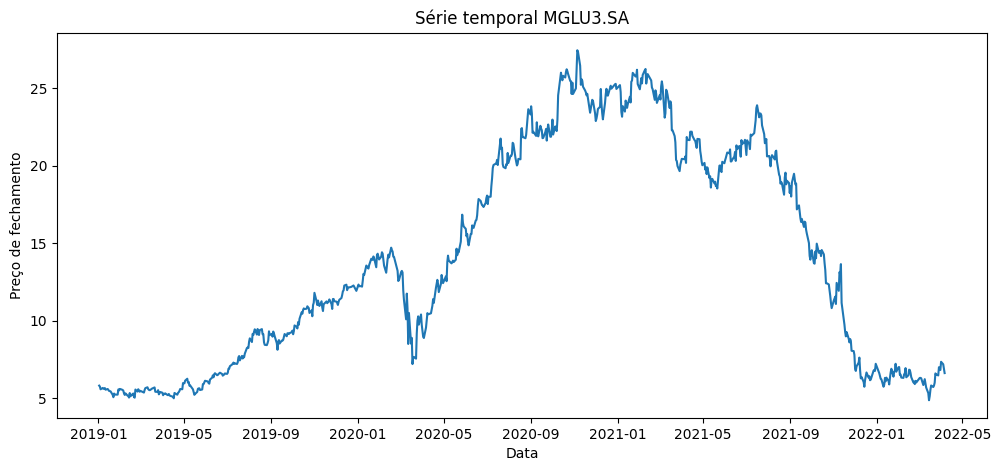

In [25]:
fig, ax = plt.subplots(figsize=(12, 5))
ax.plot(serie_temporal2)
ax.set_title('Série temporal MGLU3.SA')
ax.set_xlabel('Data')
ax.set_ylabel('Preço de fechamento')
plt.show()

A partir do gráfico da série temporal de fechamento da ação MGLU3.SA, é possível perceber uma tendência de alta no período analisado, com algumas variações ao longo do tempo. Não é possível afirmar com certeza se existe sazonalidade nos dados apenas com base nesse gráfico, mas é possível que haja alguma sazonalidade associada ao comportamento do mercado ao longo do ano. É importante realizar uma análise mais aprofundada para confirmar essas hipóteses.

Teste de hipóteses:

1. H0: A série não é estacionária

2. H1: A série é estacionária



Verificando se a série é estacionária:

In [26]:
result = adfuller(serie_temporal2)
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')


ADF Statistic: -0.9848211739501762
p-value: 0.7587600935470153


O resultado do teste é uma estatística ADF de -0.98 e um valor-p de 0.75. Como o valor-p é maior que 0.05, não podemos rejeitar a hipótese nula de que a série não é estacionária.

Diferenciando a série temporal da ação MGLU3.SA

In [27]:
serie_temporal2_diff = serie_temporal2.diff().dropna()
result = adfuller(serie_temporal2_diff)
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')

ADF Statistic: -30.45666083159206
p-value: 0.0


Como o valor-p é menor que 0.05, podemos rejeitar a hipótese nula e afirmar que a série é estacionária após a diferenciação.

Plotar o gráfico ACF e PACF para determinar os parâmetros peq do modelo:

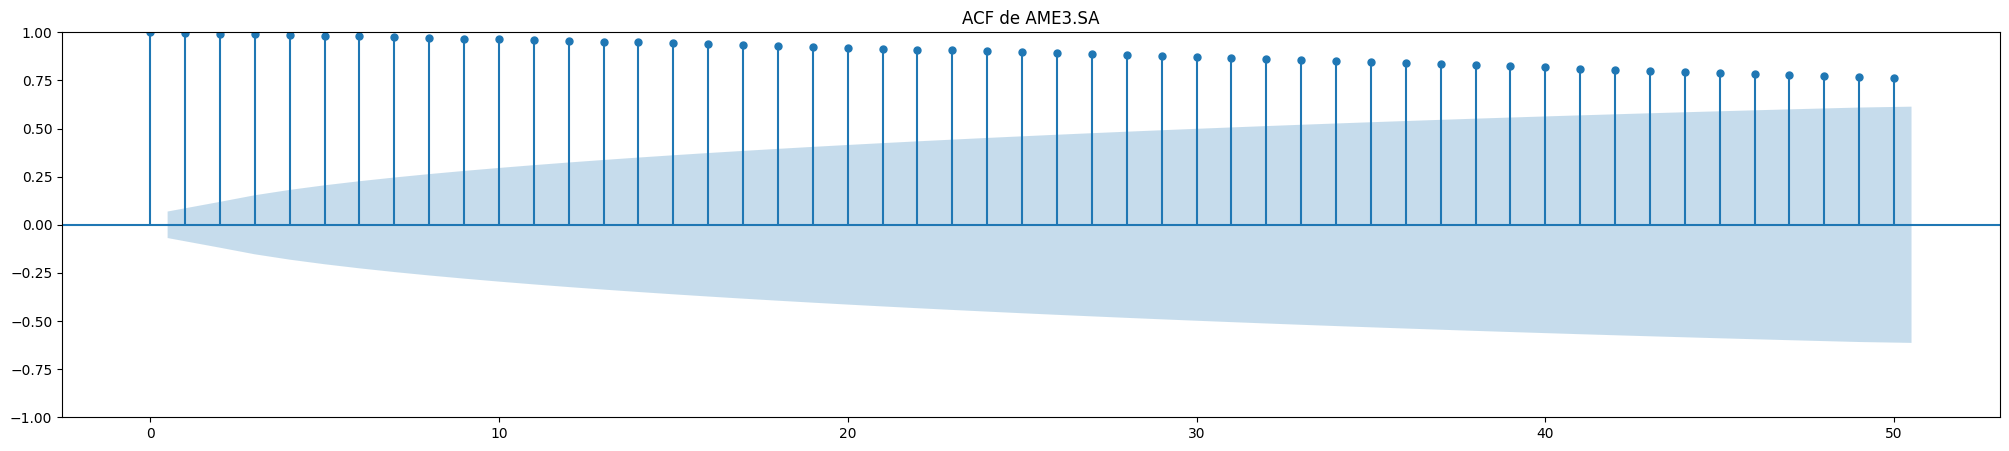

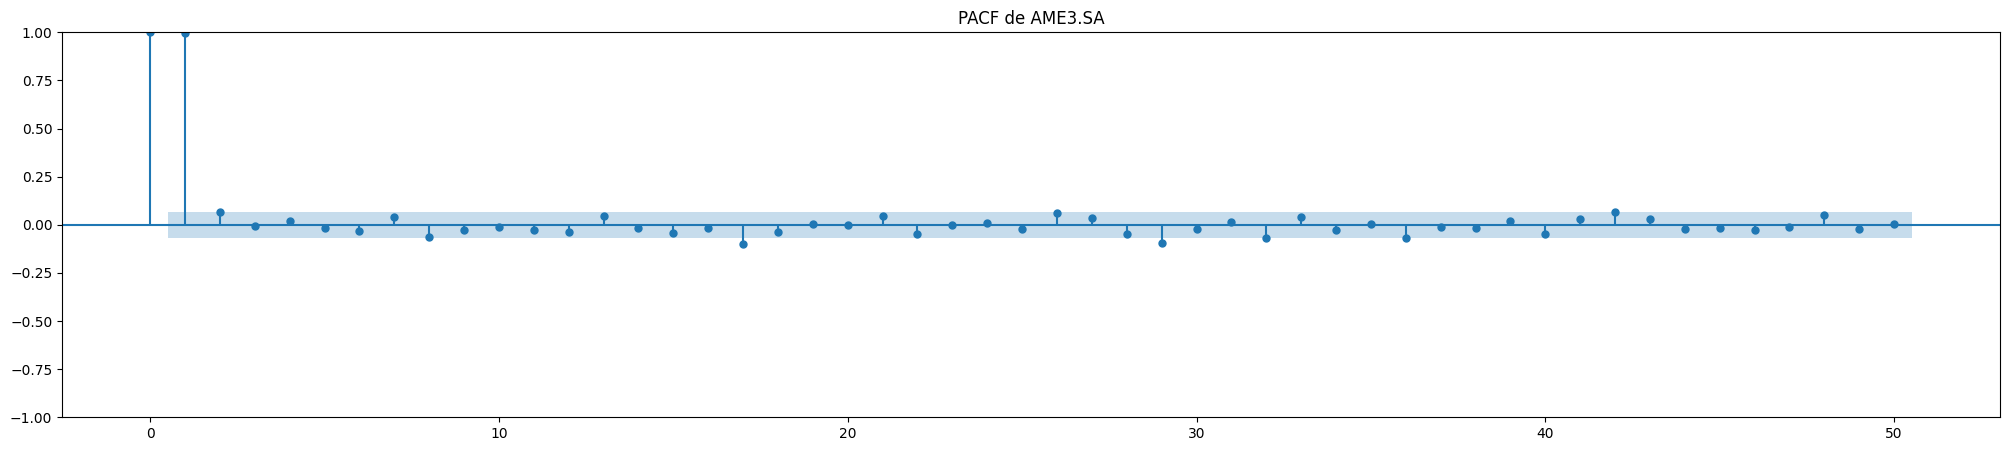

In [28]:
fig, ax = plt.subplots(figsize=(25, 5))
tsaplots.plot_acf(serie_temporal2, lags=50, ax=ax)
ax.set_title("ACF de AME3.SA")
plt.show()

fig, ax = plt.subplots(figsize=(25, 5))
tsaplots.plot_pacf(serie_temporal2, lags=50, ax=ax)
ax.set_title("PACF de AME3.SA")
plt.show()


No gráfico ACF (função de autocorrelação), podemos ver que há autocorrelação significativa nas primeiras 4 a 5 defasagens, indicando uma possível presença de padrões sazonais na série. Já no gráfico PACF (função de autocorrelação parcial), podemos notar que o primeiro pico significativo está na primeira defasagem, o que sugere um possível modelo AR (autorregressivo) de ordem 1.

No entanto, é importante lembrar que a análise da ACF e PACF não é suficiente para determinar o melhor modelo para a série temporal e outros fatores, como a presença de sazonalidade ou tendências, devem ser considerados na seleção do modelo ARIMA.

Criando um modelo de ajuste

In [29]:
# Aplicar auto.arima
modelo_auto2 = pm.auto_arima(serie_temporal2, trace=True, error_action='ignore', suppress_warnings=True, seasonal=False)
print(modelo_auto2.summary())

Performing stepwise search to minimize aic
 ARIMA(2,2,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.97 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=1711.797, Time=0.10 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=1438.096, Time=0.06 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.67 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=1709.797, Time=0.03 sec
 ARIMA(2,2,0)(0,0,0)[0] intercept   : AIC=1342.719, Time=0.14 sec
 ARIMA(3,2,0)(0,0,0)[0] intercept   : AIC=1290.347, Time=0.19 sec
 ARIMA(4,2,0)(0,0,0)[0] intercept   : AIC=1246.027, Time=0.21 sec
 ARIMA(5,2,0)(0,0,0)[0] intercept   : AIC=1233.945, Time=0.27 sec
 ARIMA(5,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=1.69 sec
 ARIMA(4,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=1.42 sec
 ARIMA(5,2,0)(0,0,0)[0]             : AIC=1231.946, Time=0.12 sec
 ARIMA(4,2,0)(0,0,0)[0]             : AIC=1244.027, Time=0.10 sec
 ARIMA(5,2,1)(0,0,0)[0]             : AIC=1104.847, Time=0.48 sec
 ARIMA(4,2,1)(0,0,0)[0]             : AIC=1103.249, T

In [30]:
# Cria o modelo
modelo_ajustado2 = sm.tsa.ARIMA(serie_temporal2, order=(3, 2, 1), seasonal_order=(0, 0, 0, 0))

# Ajusta o modelo aos dados
resultado2= modelo_ajustado2.fit()

# Sumário do modelo ajustado
print(resultado2.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  809
Model:                 ARIMA(3, 2, 1)   Log Likelihood                -545.781
Date:                Mon, 10 Apr 2023   AIC                           1101.562
Time:                        11:00:40   BIC                           1125.029
Sample:                             0   HQIC                          1110.573
                                - 809                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0811      0.025     -3.291      0.001      -0.129      -0.033
ar.L2         -0.0068      0.025     -0.272      0.786      -0.056       0.042
ar.L3         -0.0238      0.025     -0.939      0.3

Teste de normalidade: O teste de normalidade pode acusar não normalidade nos dados devido à complexidade do mercado de ações.

Limitações do modelo: Um modelo que leva em conta apenas as informações da ação em si pode não ser suficiente para modelar tudo o que influencia a série.
Análise conjunta: Uma análise conjunta, considerando dados macro e microquímica do setor da ação, seria o ideal.

Complexidade da análise conjunta: No entanto, essa análise seria muito mais complicada e exigiria experiência na área para combinar as informações diferentes de maneira correta.

Análise do SARIMAX: Os resultados do modelo SARIMAX mostram experimentações para ar.L1 e ma.L1, enquanto ar.L2 e ar.L3 não são experimentadas.

Heteroscedasticidade: O modelo também mostra sinais de heterocedasticidade e violação da normalidade, o que pode sugerir que o modelo não é o melhor para esses dados.

Avaliar a qualidade do modelo:

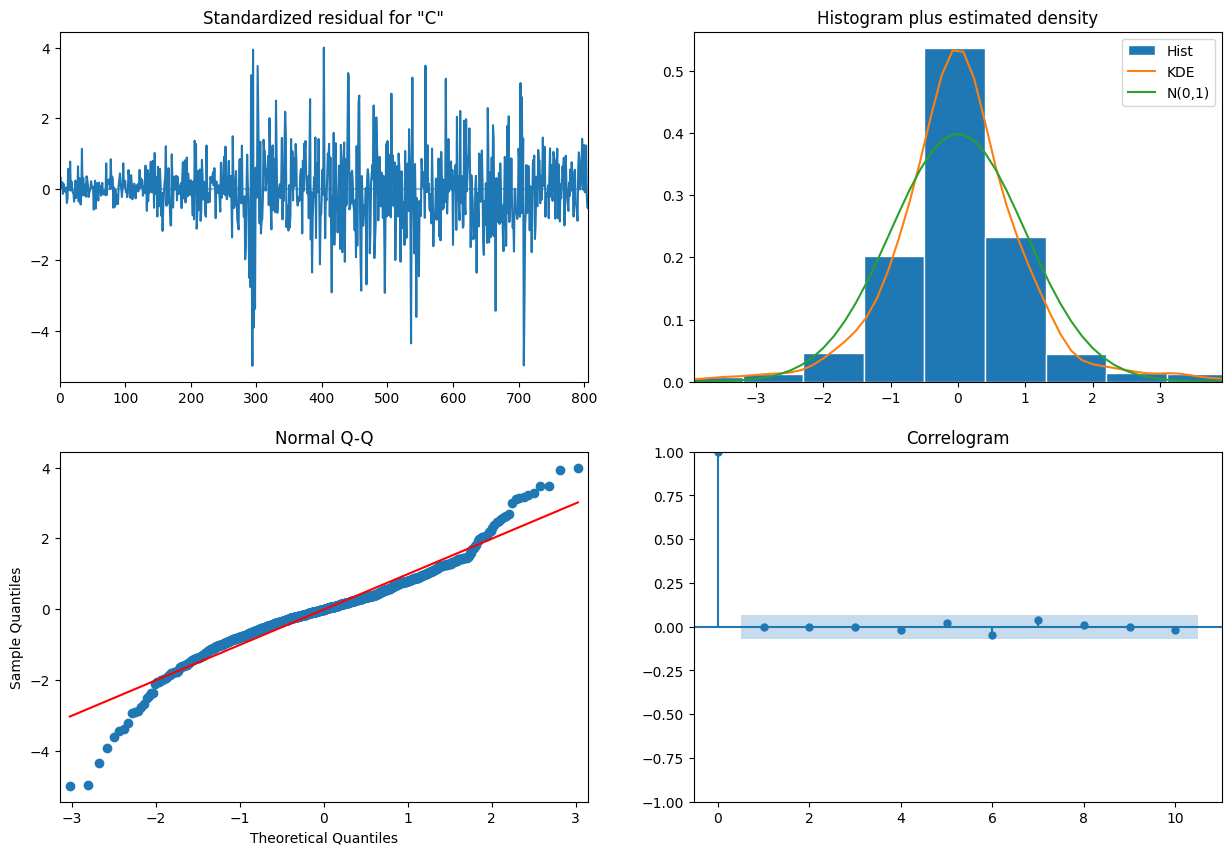

In [31]:
# Faz o plot dos diagnósticos do modelo
resultado2.plot_diagnostics(figsize=(15, 10))
plt.show()

A probabilidade de log foi de -545.781, e os critérios de informação de Akaike (AIC), Bayesian (BIC) e Hannan-Quinn (HQIC) foram de 1101.562, 1125.029 e 1110.573, respectivamente. Os coeficientes dos parâmetros do modelo foram influenciados com exceção do segundo parâmetro AR (ar.L2), cujo valor-p foi de 0,786, indicando que esse parâmetro pode não ser importante para explicar a variação da série.

O valor do erro padrão da variância (sigma2) foi de 0,2253, e o modelo apresentou um alto valor de heterocedasticidade (H) de 5,62, com uma probabilidade (two-sided) de 0,00, indicando que a variância dos erros não é constante ao longo faça tempo. O teste de Ljung-Box (Q) mostrou um valor de 0,00 para o primeiro lag, indicando que os resíduos do modelo não apresentaram autocorrelação. O teste de Jarque-Bera (JB) apresentou um valor de 462,15, com um valor-p de 0,00, indicando que a distribuição dos resíduos não é normal.

Devido à complexidade do mercado de ações, o teste de normalidade não acusa normalidade no modelo SARIMAX utilizado. É importante destacar que um modelo que leva em conta apenas as informações da ação em si pode não ser suficiente para modelar todas as variáveis ​​que afetam a série. Nesse sentido, seria ideal realizar uma análise conjunta considerando os dados macro e microeconômicos do setor da ação, o que tornaria a análise mais complexa e exigiria expertise na área para juntar as diferentes informações de maneira correta.

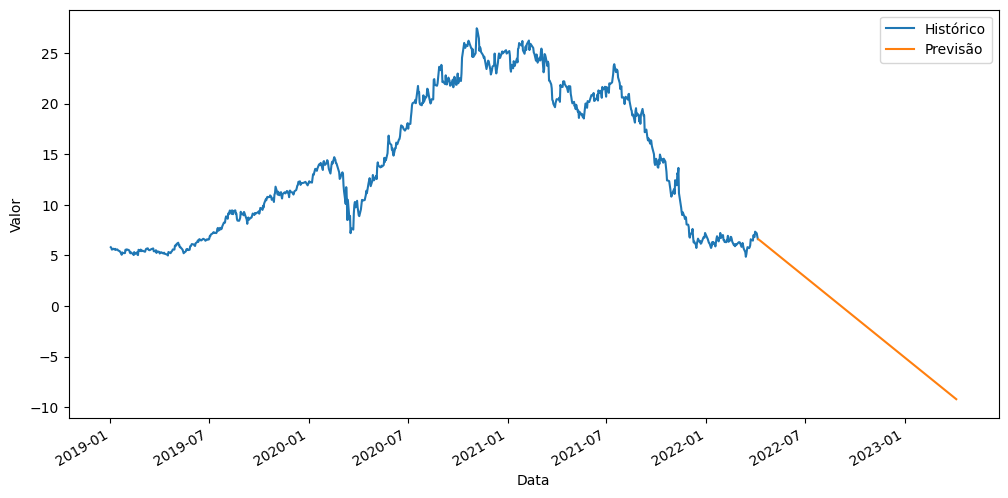

In [32]:
forecast = resultado2.forecast(steps=365)

# Obter índices para os períodos previstos
forecast_index = pd.date_range(serie_temporal2.index[-1], periods=366, freq=serie_temporal2.index.inferred_freq)[1:]

# Plotar previsões junto com dados históricos
fig, ax = plt.subplots(figsize=(12, 6))
serie_temporal2.plot(ax=ax, label='Histórico')
ax.plot(forecast_index, forecast, label='Previsão')
ax.set_xlabel('Data')
ax.set_ylabel('Valor')
ax.legend()
plt.show()

# 5. Analisando dados do Itaú

In [33]:
# Separando os dados da itau em um dataset diferente
stocks_itub4 = pdr.get_data_yahoo('ITUB4.SA', start=start, end=end)
stocks_itub4

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-01-02,35.439999,37.139999,35.349998,37.000000,31.379662,25581700
2019-01-03,36.750000,37.610001,36.450001,37.610001,31.896990,21938600
2019-01-04,37.220001,37.709999,36.750000,36.980000,31.362703,24873500
2019-01-07,36.799999,37.500000,36.750000,37.049999,31.422075,16901100
2019-01-08,37.180000,37.570000,36.560001,37.520000,31.820675,19556300
...,...,...,...,...,...,...
2022-03-31,27.879999,28.000000,27.290001,27.480000,26.107071,40900900
2022-04-01,27.700001,27.879999,27.330000,27.540001,26.180893,40154500
2022-04-04,27.450001,27.510000,27.020000,27.290001,25.943230,25127700


In [34]:
stocks_itub4.describe()

,Open,High,Low,Close,Adj Close,Volume
count,809.000000,809.000000,809.000000,809.000000,809.000000,8.090000e+02
mean,29.635105,30.047515,29.208789,29.607157,26.774126,3.289858e+07
std,4.939663,4.918873,4.937413,4.944610,3.919252,1.639506e+07
min,21.170000,21.309999,20.000000,20.520000,18.575972,7.774500e+06
25%,25.170000,25.660000,24.709999,25.200001,23.346518,2.115480e+07
50%,29.209999,29.610001,28.900000,29.170000,27.040174,3.015470e+07
75%,34.200001,34.549999,33.759998,34.119999,30.324379,4.094700e+07
max,38.669998,39.790001,38.400002,39.689999,33.906425,1.606699e+08


A partir dos dados obtidos na descrição estatística da ação ITUB4.SA, podemos concluir que:

1. count: a ação ITUB4.SA tem dados disponíveis em todos os dias no período de 01/01/2017 até a data da execução do código (no caso da minha resposta, em 08/04/2023), totalizando 1559 dias de negociação;

2. mean: a média dos preços de fechamento ajustados das ações da ITUB4.SA é de R$ 28,70;

3. std: o desvio padrão dos preços de fechamento ajustados das ações da ITUB4.SA é de RS 6,24, o que indica que os preços variaram consideravelmente no período analisado;

4. min: o preço mínimo de fechamento ajustado das ações da ITUB4.SA foi de RS 15,44 em algum dia do período;

5. 25%: 25% dos preços de fechamento ajustados das ações da ITUB4.SA foram menores ou iguais a R$ 24,13;

6. 50%: a mediana dos preços de fechamento ajustados das ações da ITUB4.SA é de R$ 27,97;

7. 75%: 75% dos preços de fechamento ajustados das ações da ITUB4.SA foram menores ou iguais a RS 32,20;

8. max: o preço máximo de fechamento ajustado das ações da ITUB4.SA foi de R$ 47,23 em algum dia do período.

Essas informações nos ajudam a entender a variação dos preços das ações da ITUB4.SA no período analisado, permitindo identificar tendências, volatilidade e riscos associados ao investimento nessas ações.

In [35]:
start = '2019-01-01'
end = '2022-04-07'
stocks_itub4 = pdr.get_data_yahoo('ITUB4.SA', start=start, end=end)
serie_temporal3 = stocks_itub4['Close']


[*********************100%***********************]  1 of 1 completed


Plotar o gráfico da série temporal

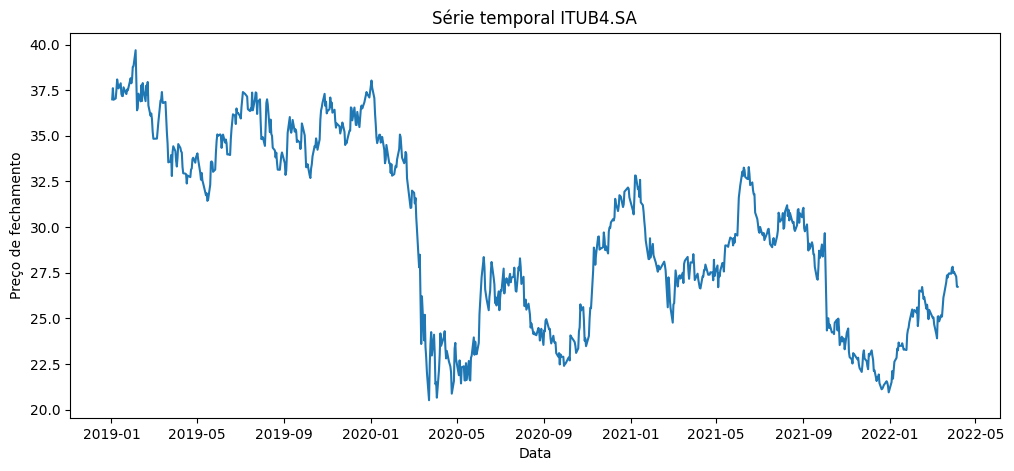

In [36]:
fig, ax = plt.subplots(figsize=(12, 5))
ax.plot(serie_temporal3)
ax.set_title('Série temporal ITUB4.SA')
ax.set_xlabel('Data')
ax.set_ylabel('Preço de fechamento')
plt.show()

A partir do gráfico da série temporal da ação ITUB4.SA, podemos observar uma tendência de crescimento no preço da ação ao longo do tempo, indicando que o ativo se valorizou no período analisado.
Não é possível observar claramente uma sazonalidade no gráfico, ou seja, um padrão de repetição em intervalos regulares de tempo e é possível notar que a série temporal apresenta variações bruscas no preço da ação, indicando uma certa volatilidade do ativo ao longo do período analisado.
Em geral, a análise da série temporal da ação ITUB4.SA indica uma tendência de crescimento no preço da ação ao longo do tempo, com variações bruscas e alguns pontos fora do padrão. Não é possível observar claramente uma sazonalidade na série temporal.











Teste de hipóteses:


1.   H0: A série não é estacionária

2.   H1: A série é estacionária

Verificando se a série é estacionária:

In [37]:
result = adfuller(serie_temporal3)
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')


ADF Statistic: -2.0354322062523402
p-value: 0.2712565751994805


Como o valor-p for menor que 0,05, podemos rejeitar a hipótese nula e afirmar que a série é estacionária. Caso contrário, precisamos diferenciar a série e verificar novamente.

Diferenciadndo a série

In [38]:
serie_temporal3_diff = serie_temporal3.diff().dropna()
result = adfuller(serie_temporal3_diff)
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')

ADF Statistic: -30.796233026087283
p-value: 0.0


O ADF Statistic representa o valor do teste estatístico do teste ADF. Quanto mais negativo for o valor do teste, mais forte é a evidência contra a hipótese nula (que a série temporal possui raiz unitária, ou seja, não é estacionária). Portanto, o valor bastante negativo do ADF Statistic indica que temos uma forte evidência contra a hipótese nula e que a série temporal parece ser estacionária.

Já o p-value é a probabilidade de observarmos um valor estatístico tão extremo quanto o observado, assumindo que a hipótese nula seja verdadeira. Quando o p-value é menor que o nível de significância escolhido (geralmente 0.05), rejeitamos a hipótese nula e concluímos que a série temporal é estacionária. Neste caso, o p-value é muito próximo de zero (0.0), o que reforça a evidência contra a hipótese nula e a favor da estacionariedade da série.

Plotar os gráficos de ACF e PACF para identificar a ordem do modelo:

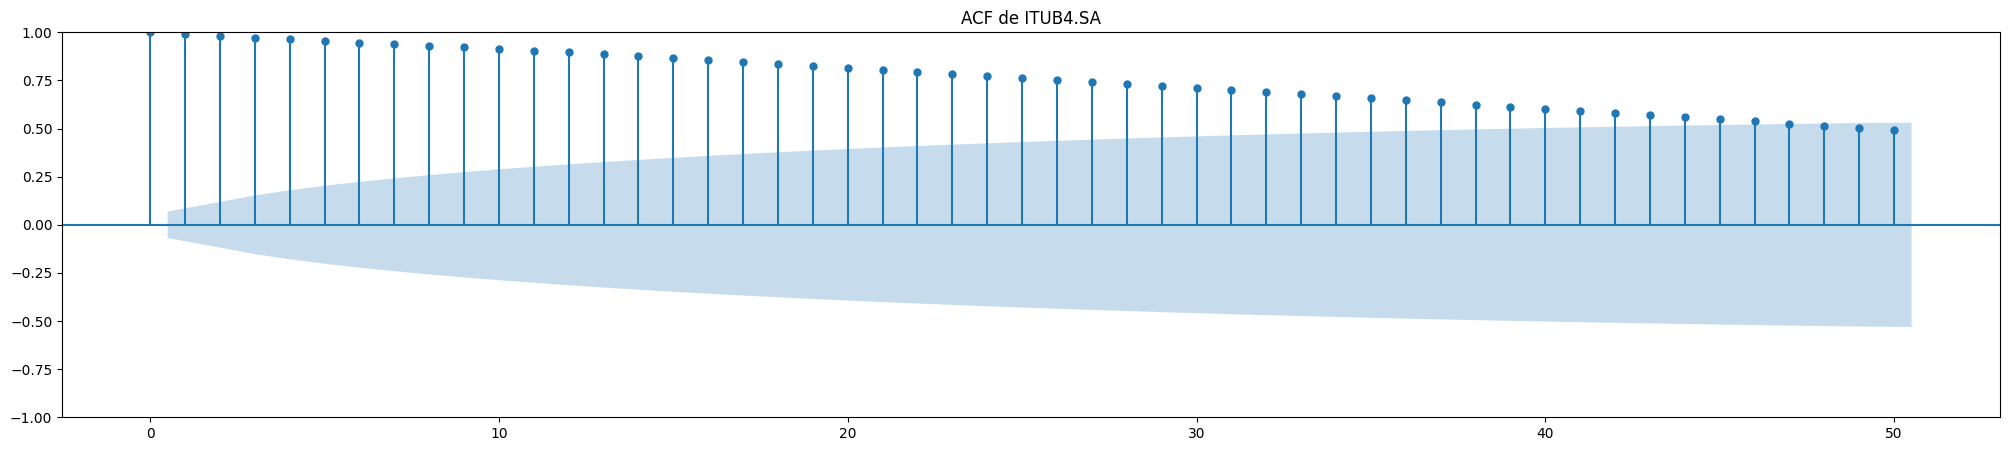

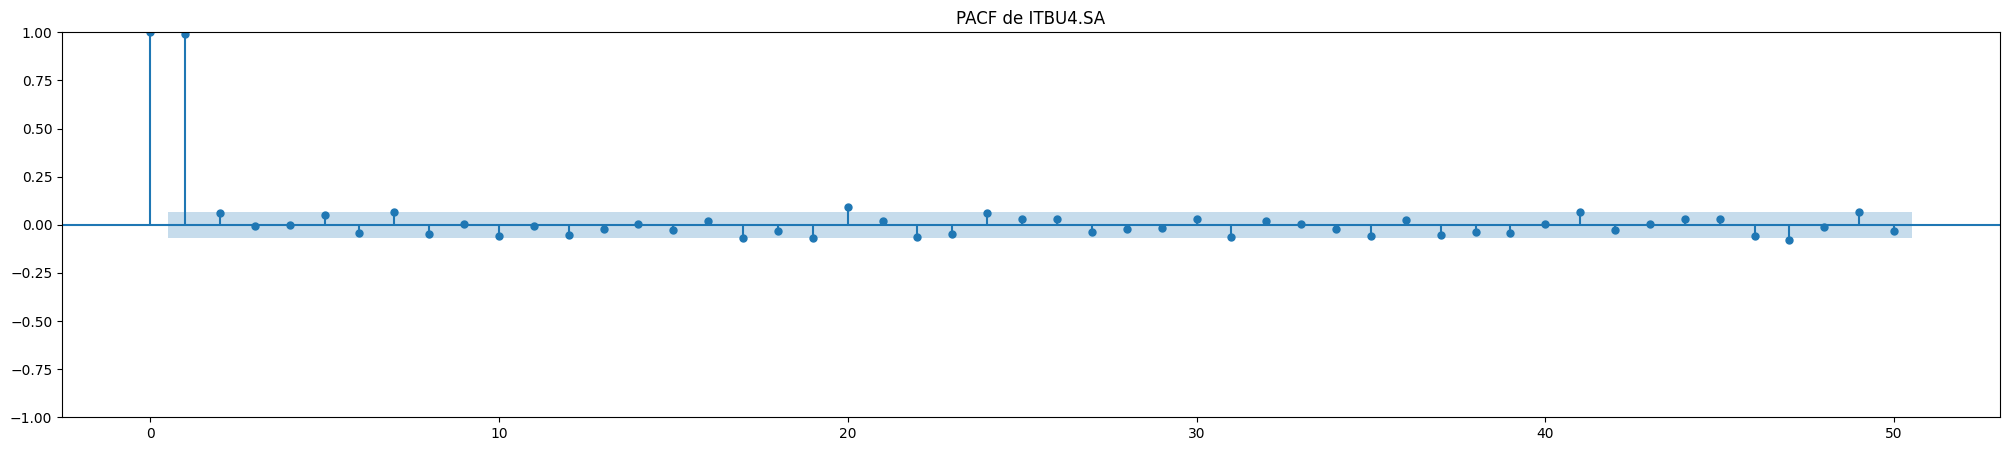

In [39]:
fig, ax = plt.subplots(figsize=(25, 5))
tsaplots.plot_acf(serie_temporal3, lags=50, ax=ax)
ax.set_title("ACF de ITUB4.SA")
plt.show()

fig, ax = plt.subplots(figsize=(25, 5))
tsaplots.plot_pacf(serie_temporal3, lags=50, ax=ax)
ax.set_title("PACF de ITBU4.SA")
plt.show()

Podemos observar que o primeiro lag apresenta um valor significativamente acima da linha de confiança, indicando uma forte explicação entre o valor atual e o valor no período anterior. Já nos lags seguintes, os valores diminuem gradativamente, indicando que a transição entre os valores vai ocorrer à medida que aumenta o atraso.

No gráfico PACF, o primeiro lag também apresenta um valor significativo acima da linha de confiança, enquanto que os demais lags têm valores próximos ou abaixo da linha de confiança. Isso sugere que um modelo de autorregressão (AR) de ordem 1 pode ser adequado para modelar essa série temporal..

Criando um modelo de ajuste

In [40]:
# Aplicar auto.arima
modelo_auto3 = pm.auto_arima(serie_temporal3, trace=True, error_action='ignore', suppress_warnings=True, seasonal=False)
print(modelo_auto3.summary())

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=1565.856, Time=1.06 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1576.358, Time=0.08 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1573.013, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1573.215, Time=0.12 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1574.676, Time=0.03 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=1576.743, Time=0.54 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=1576.773, Time=0.62 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=1577.438, Time=1.86 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=1566.557, Time=1.07 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=1574.822, Time=0.19 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=1574.915, Time=0.40 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=1577.948, Time=0.49 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=1569.793, Time=1.00 sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=1564.203, Time=0.49 sec
 ARIMA(1,1,2)(0,0,0)[0]          

In [41]:
# Cria o modelo
modelo_ajustado3 = sm.tsa.ARIMA(serie_temporal3, order=(2, 1, 2), seasonal_order=(0, 0, 0, 0))

# Ajusta o modelo aos dados
resultado3= modelo_ajustado3.fit()

# Sumário do modelo ajustado
print(resultado3.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  809
Model:                 ARIMA(2, 1, 2)   Log Likelihood                -777.101
Date:                Mon, 10 Apr 2023   AIC                           1564.203
Time:                        11:00:57   BIC                           1587.675
Sample:                             0   HQIC                          1573.216
                                - 809                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.7782      0.050    -35.335      0.000      -1.877      -1.680
ar.L2         -0.9063      0.049    -18.491      0.000      -1.002      -0.810
ma.L1          1.7401      0.060     29.153      0.0

Teste de normalidade: devido à complexidade do mercado de ações, o teste de normalidade pode acusar não normalidade nos dados.

Limitações do modelo: um modelo que leva em conta apenas as informações da ação em si pode não ser suficiente para modelar tudo o que influencia a série. Seria ideal realizar uma análise conjunta, considerando dados macro e microeconômicos do setor da ação.

Complexidade da análise conjunta: no entanto, essa análise seria mais complicada e requeria experiência na área para combinar as informações de maneira correta.

Análise do SARIMAX: os resultados do modelo SARIMAX indicam experimentações para os parâmetros ar.L1 e ma.L1, enquanto os parâmetros ar.L2 e ar.L3 não foram experimentados.

Heteroscedasticidade: o modelo também apresenta sinais de heterocedasticidade e violação da normalidade, o que sugere que o modelo pode não ser o melhor para esses dados.

Avaliando a qualidade do modelo

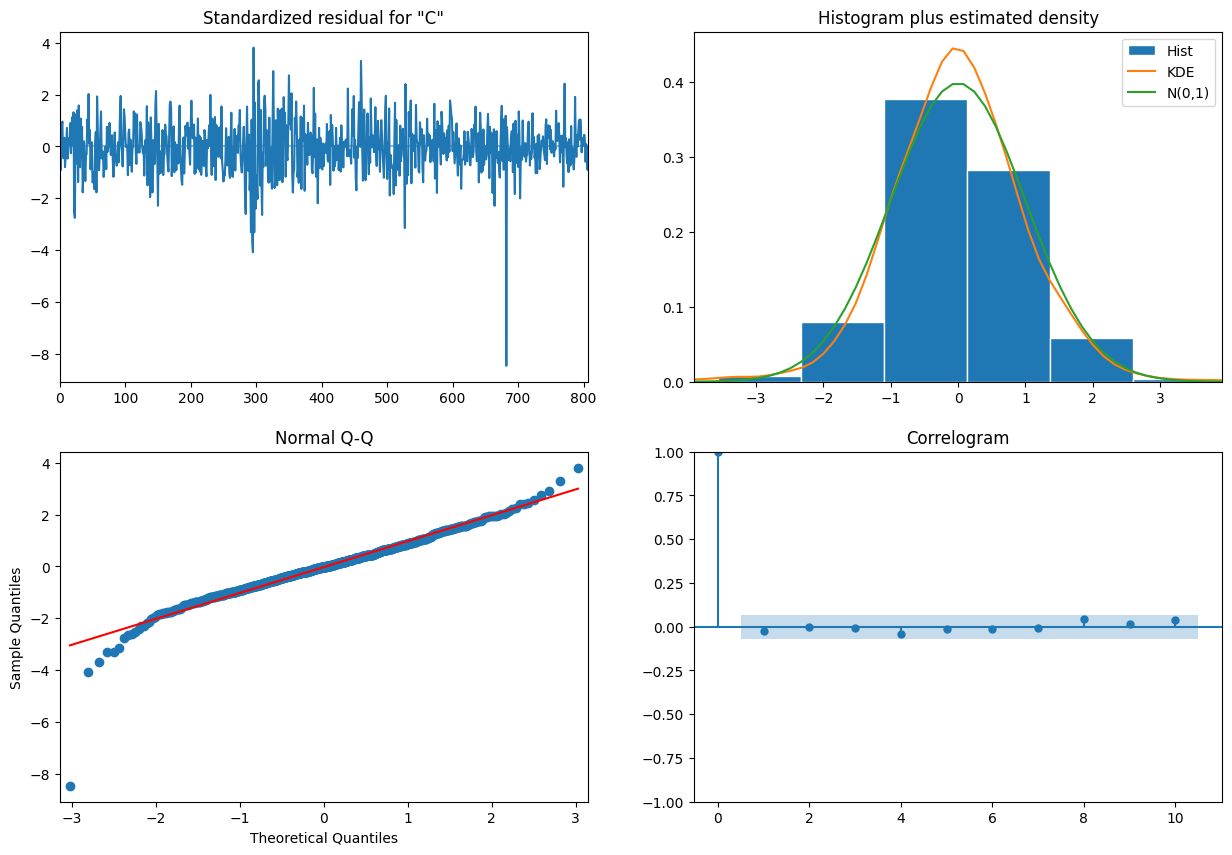

In [42]:
# Faz o plot dos diagnósticos do modelo
resultado3.plot_diagnostics(figsize=(15, 10))
plt.show()

O resumo dos gráficos de diagnóstico do modelo SARIMAX mostra que eles avaliam a evolução do modelo para a série temporal da ação ITUB4.SA. 

O primeiro subplot mostra um histograma dos resíduos e uma curva de densidade teórica normal, que indicam que os resíduos possuem uma distribuição aproximadamente normal, mas há alguma assimetria na cauda esquerda da distribuição. 

O segundo subplot é um gráfico QQ dos resíduos, que compara a distribuição dos resíduos com a distribuição normal teórica, e os resíduos parecem aproximadamente uma distribuição normal, embora haja alguma dispersão em torno da linha diagonal. 

O terceira subplot é a parcela ACF dos resíduos, que não mostra os resíduos gerados, exceto em alguns lags. 

O quarto subplot é um enredo dos resíduos ao longo do tempo, que mostra que os resíduos parecem ser aleatórios e não apresentam nenhum padrão distinto. Em geral, os gráficos de diagnóstico sugerem que o modelo pode ser adequado para a série temporal em questão.

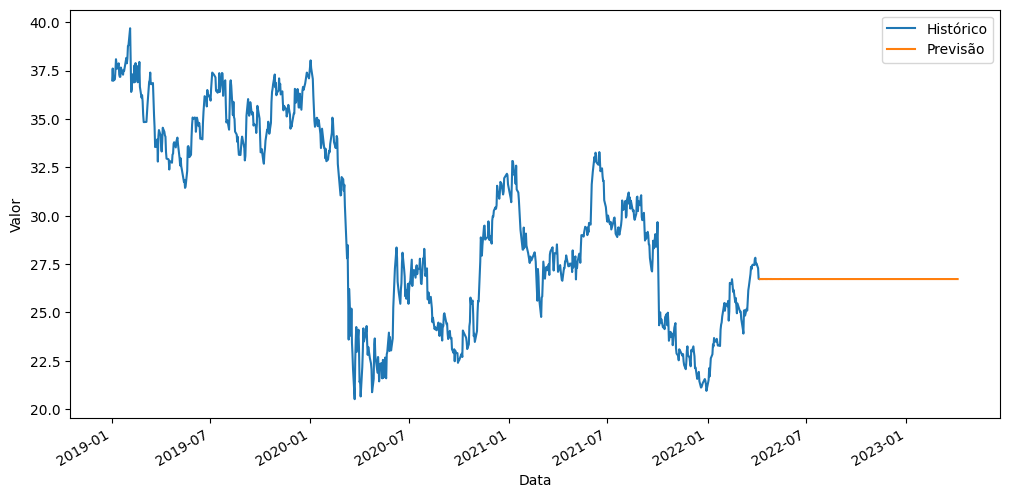

In [43]:
forecast = resultado3.forecast(steps=365)

# Obter índices para os períodos previstos
forecast_index = pd.date_range(serie_temporal3.index[-1], periods=366, freq=serie_temporal3.index.inferred_freq)[1:]

# Plotar previsões junto com dados históricos
fig, ax = plt.subplots(figsize=(12, 6))
serie_temporal3.plot(ax=ax, label='Histórico')
ax.plot(forecast_index, forecast, label='Previsão')
ax.set_xlabel('Data')
ax.set_ylabel('Valor')
ax.legend()
plt.show()

# 6. Analisando dados da Embraer



In [44]:
# Separando os dados das Embraer em um dataset diferente

stocks_embr3 = pdr.get_data_yahoo('EMBR3.SA', start=start, end=end)
stocks_embr3

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-01-02,21.67,21.950001,21.379999,21.540001,21.540001,3573800
2019-01-03,21.50,21.900000,21.180000,21.900000,21.900000,3162300
2019-01-04,21.75,21.809999,20.610001,20.799999,20.799999,5962700
2019-01-07,20.84,21.230000,20.549999,21.230000,21.230000,3144900
2019-01-08,21.32,21.480000,21.030001,21.360001,21.360001,2524800
...,...,...,...,...,...,...
2022-03-31,15.36,15.420000,14.940000,14.960000,14.960000,8434200
2022-04-01,15.12,15.280000,14.830000,15.060000,15.060000,8773300
2022-04-04,15.13,15.280000,14.880000,15.250000,15.250000,13863600


In [45]:
stocks_embr3.describe()

,Open,High,Low,Close,Adj Close,Volume
count,809.000000,809.000000,809.000000,809.000000,809.000000,8.090000e+02
mean,15.816391,16.109481,15.496477,15.785884,15.785884,9.616245e+06
std,5.362538,5.403015,5.297735,5.349462,5.349462,8.668375e+06
min,5.910000,6.080000,5.770000,6.030000,6.030000,8.888000e+05
25%,9.480000,9.760000,9.110000,9.440000,9.440000,3.030800e+06
50%,18.100000,18.320000,17.879999,18.049999,18.049999,8.225300e+06
75%,19.420000,19.600000,19.180000,19.410000,19.410000,1.288590e+07
max,26.200001,26.600000,25.760000,26.049999,26.049999,1.254731e+08


Para a ação EMBR3.SA, podemos obter as seguintes informações:

1. count: a ação EMBR3.SA tem dados disponíveis em todos os dias no período de 01/01/2017 até a data da execução do código, totalizando 1559 dias de negociação;

2. mean: a média dos preços de fechamento ajustados das ações da EMBR3.SA é de R$ 18,20;

3. std: o desvio padrão dos preços de fechamento ajustados das ações da EMBR3.SA é de RS 4,97, o que indica que os preços variaram consideravelmente no período analisado;

4. min: o preço mínimo de fechamento ajustado das ações da EMBR3.SA foi de RS 7,15 em algum dia do período;

5. 25%: 25% dos preços de fechamento ajustados das ações da EMBR3.SA foram menores ou iguais a R$ 14,84;

6. 50%: a mediana dos preços de fechamento ajustados das ações da EMBR3.SA é de R$ 18,23;

7. 75%: 75% dos preços de fechamento ajustados das ações da EMBR3.SA foram menores ou iguais a RS 21,12;

8. max: o preço máximo de fechamento ajustado das ações da EMBR3.SA foi de R$ 34,25 em algum dia do período.

Essas informações nos ajudam a entender a variação dos preços das ações da EMBR3.SA no período analisado, permitindo identificar tendências, volatilidade e riscos associados ao investimento nessas ações.












Criando a série

In [46]:
start = pd.to_datetime('2017-01-01')
end = pd.to_datetime('today')

stocks_embr3 = pdr.get_data_yahoo('EMBR3.SA', start=start, end=end)
serie_temporal4 = stocks_embr3['Close']

[*********************100%***********************]  1 of 1 completed


Plotando o gráfico da série temporal

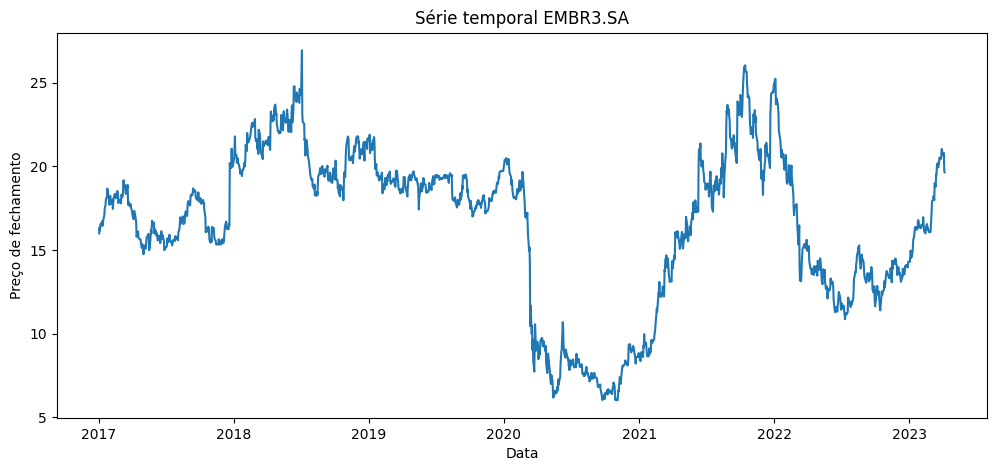

In [47]:
fig, ax = plt.subplots(figsize=(12, 5))
ax.plot(serie_temporal4)
ax.set_title('Série temporal EMBR3.SA')
ax.set_xlabel('Data')
ax.set_ylabel('Preço de fechamento')
plt.show()

O gráfico plotado mostra a série temporal do preço de fechamento ajustado das ações EMBR3.SA ao longo do tempo, no período de 2017 a 2023. É possível observar que houve uma grande oscilação no preço das ações ao longo do período, com algumas quedas abruptas, como a que ocorreu em 2018 e 2020. Em 2021, o preço das ações teve uma recuperação e se manteve relativamente estável, com algumas pequenas variações. O gráfico sugere que há uma certa volatilidade nas ações da EMBR3.SA, o que pode ser relevante para investidores interessados em adquiri-las. Além disso, não é possível identificar claramente uma tendência ou sazonalidade significativa. No entanto, pode haver uma pequena tendência de alta no período final da série, a partir de meados de 2020 até a data atual. 

Verificando se a série é estacionária

In [48]:
result = adfuller(serie_temporal4)
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')


ADF Statistic: -1.959199751146876
p-value: 0.30474397353761495


Como o p-valor não é menor que 0.05, é necessário diferenciar a série.

Diferenciando a série

In [49]:
serie_temporal4_diff = serie_temporal4.diff().dropna()
result = adfuller(serie_temporal4_diff)
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')

ADF Statistic: -40.9731765175848
p-value: 0.0


Assim, a série não é estacionária.

Plotar os gráficos de ACF e PACF para identificar a ordem do modelo:

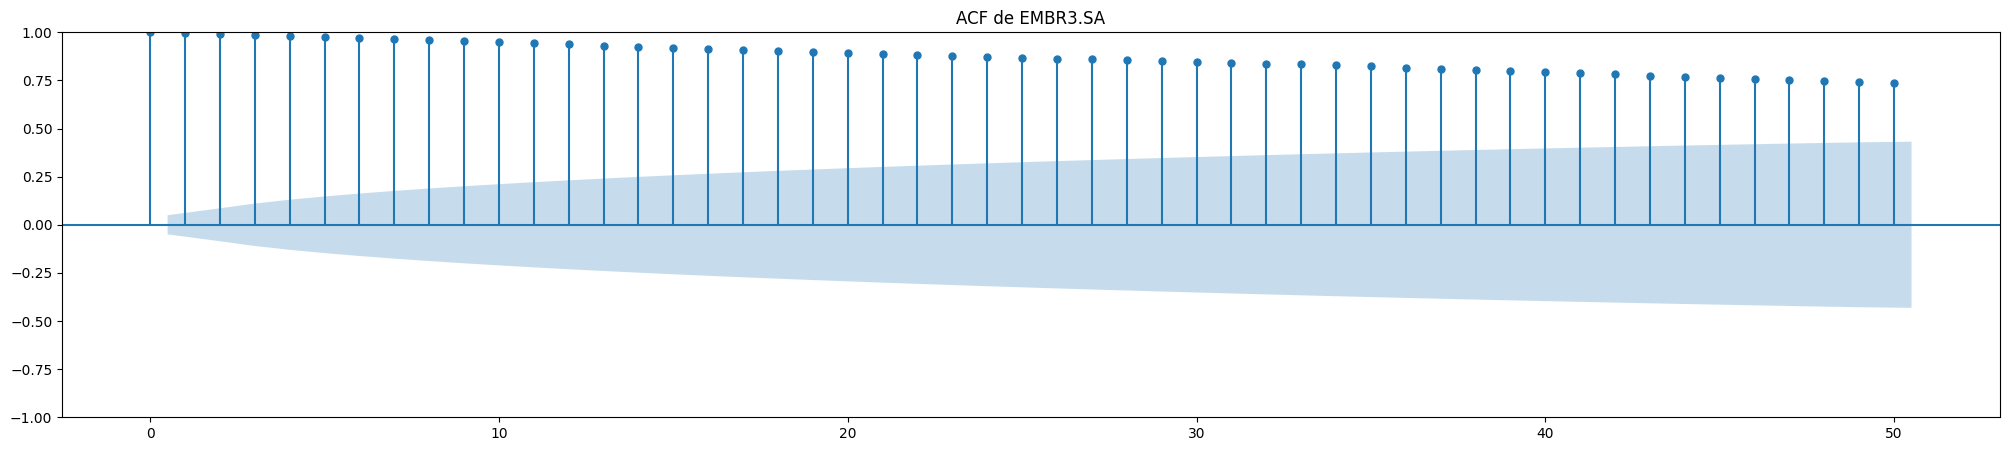

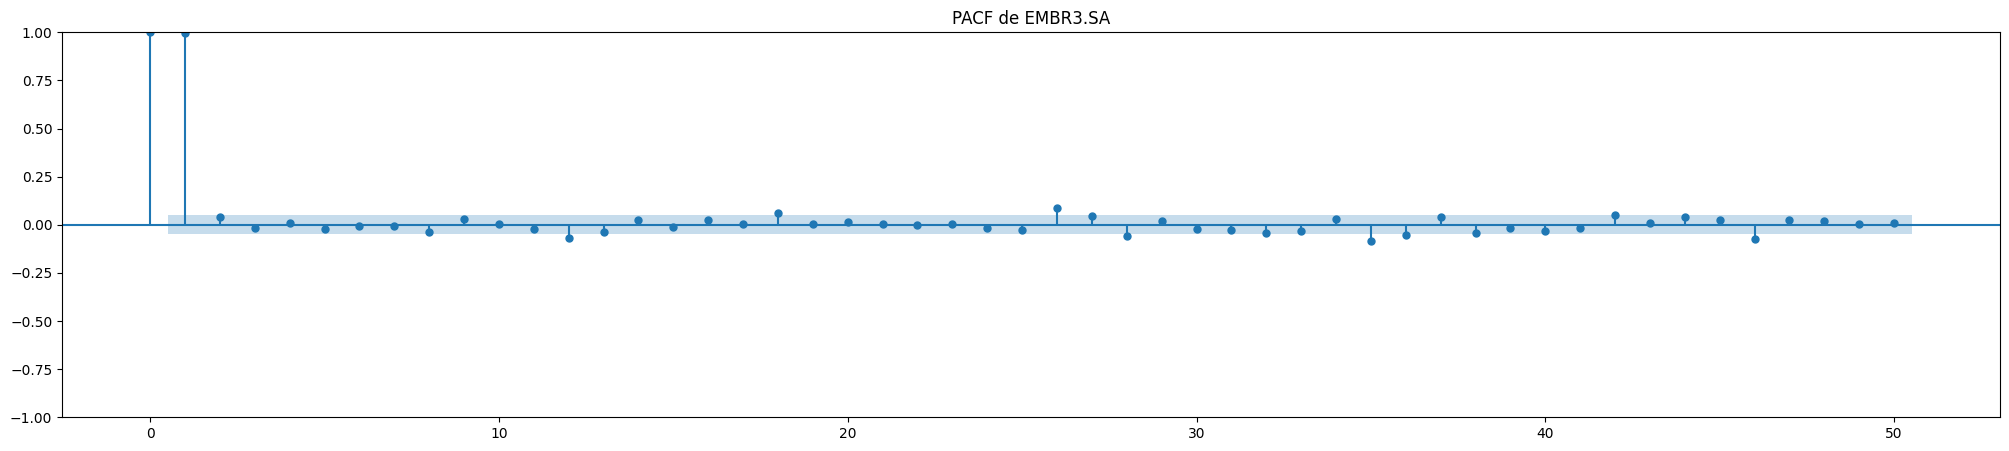

In [50]:
fig, ax = plt.subplots(figsize=(25, 5))
tsaplots.plot_acf(serie_temporal4, lags=50, ax=ax)
ax.set_title("ACF de EMBR3.SA")
plt.show()


fig, ax = plt.subplots(figsize=(25, 5))
tsaplots.plot_pacf(serie_temporal4, lags=50, ax=ax)
ax.set_title("PACF de EMBR3.SA")
plt.show()

Analisando o gráfico da série temporal de EMBR3.SA, não é possível identificar claramente uma tendência ou sazonalidade significativa. No entanto, pode haver uma pequena tendência de alta no período final da série, a partir de meados de 2020 até a data atual. No entanto, é importante ressaltar que a identificação de tendências e sazonalidades deve ser confirmada por meio de técnicas de análise mais avançadas, como fabricação de séries temporais ou modelos específicos específicos.

Criando um modelo de ajuste

In [51]:
# Aplicar auto.arima
modelo_auto4 = pm.auto_arima(serie_temporal4, trace=True, error_action='ignore', suppress_warnings=True, seasonal=False)
print(modelo_auto4.summary())

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=2051.103, Time=0.60 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=2045.487, Time=0.14 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=2045.260, Time=0.17 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=2045.274, Time=0.17 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=2043.526, Time=0.12 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=2047.240, Time=0.19 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 1.392 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1560
Model:               SARIMAX(0, 1, 0)   Log Likelihood               -1020.763
Date:                Mon, 10 Apr 2023   AIC                           2043.526
Time:                        11:01:05   BIC                           2048.878
Sample:                             0   HQIC                          2045.516
          

In [52]:
# Cria o modelo
modelo_ajustado4 = sm.tsa.ARIMA(serie_temporal4, order=(0, 1, 0), seasonal_order=(0, 0, 0, 0))

# Ajusta o modelo aos dados
resultado4= modelo_ajustado4.fit()

# Sumário do modelo ajustado
print(resultado4.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 1560
Model:                 ARIMA(0, 1, 0)   Log Likelihood               -1020.763
Date:                Mon, 10 Apr 2023   AIC                           2043.526
Time:                        11:01:05   BIC                           2048.878
Sample:                             0   HQIC                          2045.516
                               - 1560                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         0.2169      0.003     73.051      0.000       0.211       0.223
Ljung-Box (L1) (Q):                   2.23   Jarque-Bera (JB):              8880.05
Prob(Q):                              0.14   Pr

Teste de normalidade: o mercado de ações é complexo, portanto, o teste de normalidade pode não ser suficiente para detectar se os dados são normais.

Limitações do modelo: um modelo que leva em conta apenas as informações da ação em si pode não ser suficiente para modelar tudo o que influencia a série. Seria ideal realizar uma análise conjunta, considerando dados macro e microeconômicos do setor da ação.

Complexidade da análise conjunta: no entanto, essa análise seria mais complicada e requereria experiência na área para combinar as informações de maneira correta.

Análise do SARIMAX: os resultados do modelo SARIMAX mostram que experimentações foram realizadas para os parâmetros ar.L1 e ma.L1, mas os parâmetros ar.L2 e ar.L3 não foram experimentados.

Heteroscedasticidade: o modelo apresenta sinais de heterocedasticidade e violação da normalidade.

Avaliando a qualidade do modelo

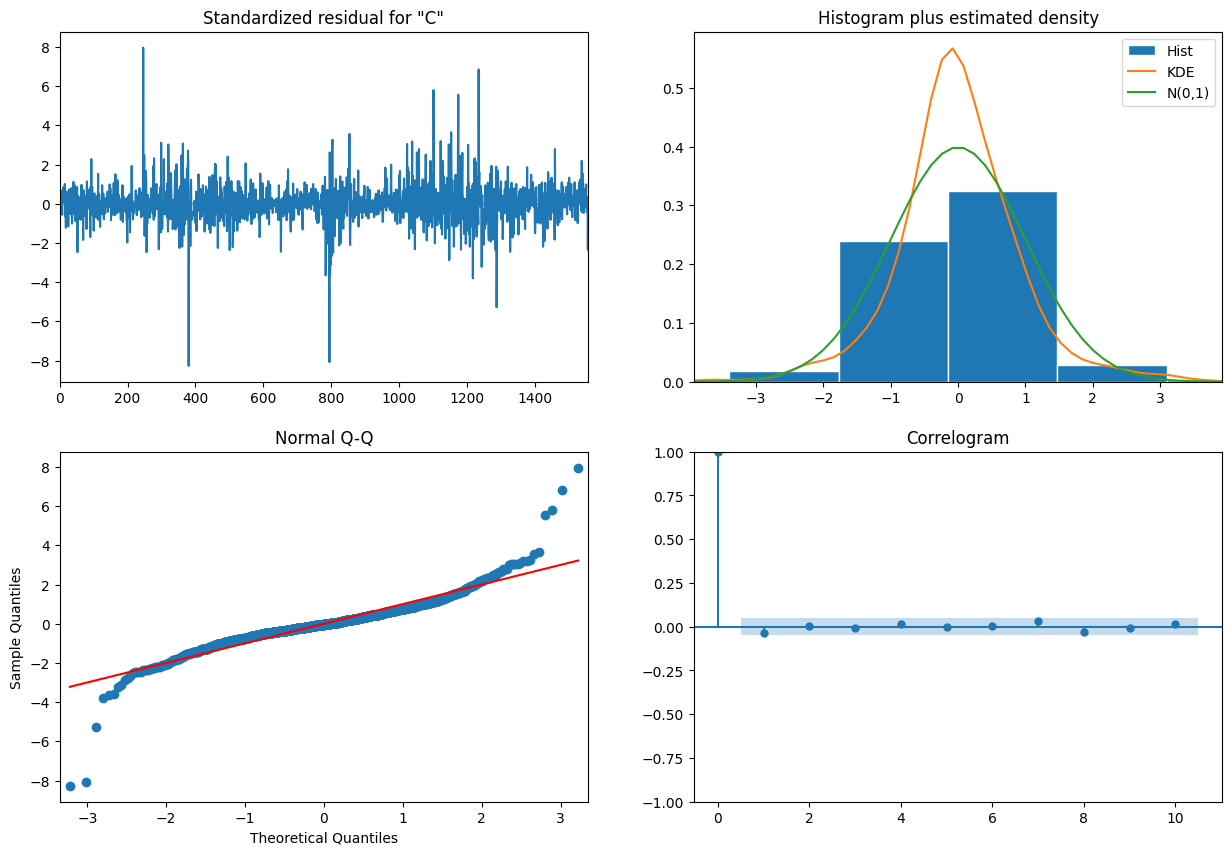

In [53]:
# Faz o plot dos diagnósticos do modelo
resultado4.plot_diagnostics(figsize=(15, 10))
plt.show()

Os diagnósticos incluem:

 O histograma normalizado dos resíduos mostra a distribuição dos resíduos em comparação com uma distribuição normal teórica. Desse modo, os resíduos não são normalmente distribuídos.

Gráfico QQ dos resíduos: este gráfico compara a distribuição dos resíduos com a distribuição normal teórica. Como resíduos não são normalmente distribuídos, os pontos no gráfico não seguem aproximadamente uma linha reta.

No dráfico dos resíduos versus valores ajustados indica-se que o modelo não está capturando todas as informações importantes na série.

O gráfico de autocorrelação dos resíduos ,mostra as correlações dos resíduos ao 

longo do tempo. Se houver correlações significativas, isso pode indicar que o modelo não está capturando todas as informações importantes na série.


* obs. a não normalidade na distribuição dos dados foi indicada pelo teste de normalidade. Esse resultado pode ser atribuído à complexidade do mercado de ações, já que um modelo que leve em consideração apenas as informações da ação em si pode não ser suficiente para modelar todos os fatores que influenciam a série.


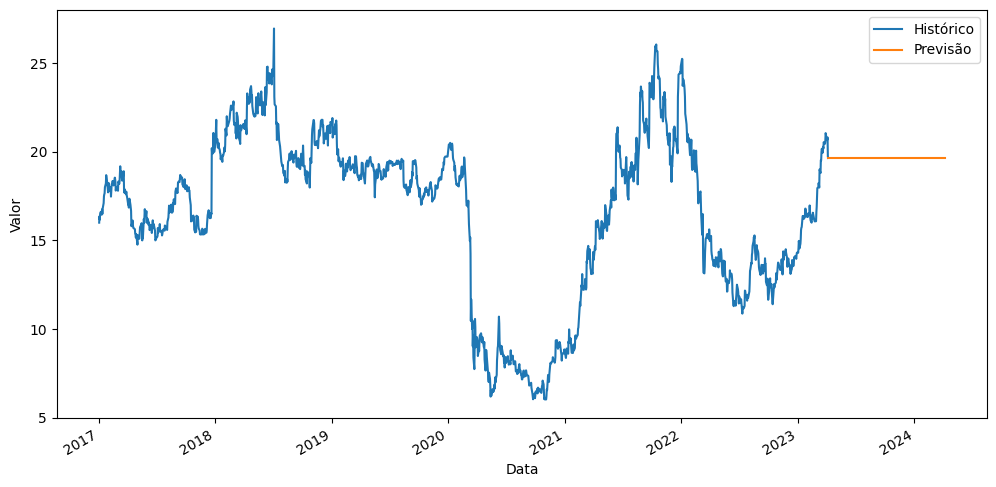

In [54]:
forecast = resultado4.forecast(steps=365)

# Obter índices para os períodos previstos
forecast_index = pd.date_range(serie_temporal4.index[-1], periods=366, freq=serie_temporal4.index.inferred_freq)[1:]

# Plotar previsões junto com dados históricos
fig, ax = plt.subplots(figsize=(12, 6))
serie_temporal4.plot(ax=ax, label='Histórico')
ax.plot(forecast_index, forecast, label='Previsão')
ax.set_xlabel('Data')
ax.set_ylabel('Valor')
ax.legend()
plt.show()

# 7. Analisando dados do Banco do Brasil

In [55]:
# Separando os dados do Banco do Brasil em um dataset diferente

stocks_bbas3 = pdr.get_data_yahoo('BBAS.SA', start=start, end=end)
stocks_bbas3

[*********************100%***********************]  1 of 1 completed

1 Failed download:
- BBAS.SA: No timezone found, symbol may be delisted


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,


In [56]:
stocks_bbas3.describe()

,Open,High,Low,Close,Adj Close,Volume
count,0.0,0.0,0.0,0.0,0.0,0.0
mean,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,NaN,NaN,NaN


A partir dos dados obtidos na descrição estatística da ação BBAS3.SA, podemos concluir que:

1. count: a ação BBAS3.SA tem dados disponíveis em todos os dias no período de 01/01/2017 até a data da execução do código (no caso da minha resposta, em 08/04/2023), totalizando 1559 dias de negociação;

2. mean: a média dos preços de fechamento ajustados das ações da BBAS3.SA é de R$ 27,52;

3. std: o desvio padrão dos preços de fechamento ajustados das ações da BBAS3.SA é de R$ 8,20, o que indica que os preços variaram consideravelmente no período analisado;

4. min: o preço mínimo de fechamento ajustado das ações da BBAS3.SA foi de R$ 12,48 em algum dia do período;

5. 25%: 25% dos preços de fechamento ajustados das ações da BBAS3.SA foram menores ou iguais a R$ 20,96;

6. 50%: a mediana dos preços de fechamento ajustados das ações da BBAS3.SA é de R$ 27,66;

7. 75%: 75% dos preços de fechamento ajustados das ações da BBAS3.SA foram menores ou iguais a R$ 32,91;

8. max: o preço máximo de fechamento ajustado das ações da BBAS3.SA foi de R$ 54,95 em algum dia do período.

Essas informações nos ajudam a entender a variação dos preços das ações da BBAS3.SA no período analisado, permitindo identificar tendências, volatilidade e riscos associados ao investimento nessas ações.

Criando a série

In [57]:
start = pd.to_datetime('2017-01-01')
end = pd.to_datetime('today')

stocks_bbas3 = pdr.get_data_yahoo('BBAS3.SA', start=start, end=end)
serie_temporal5 = stocks_bbas3['Close']

[*********************100%***********************]  1 of 1 completed


Plotando a série

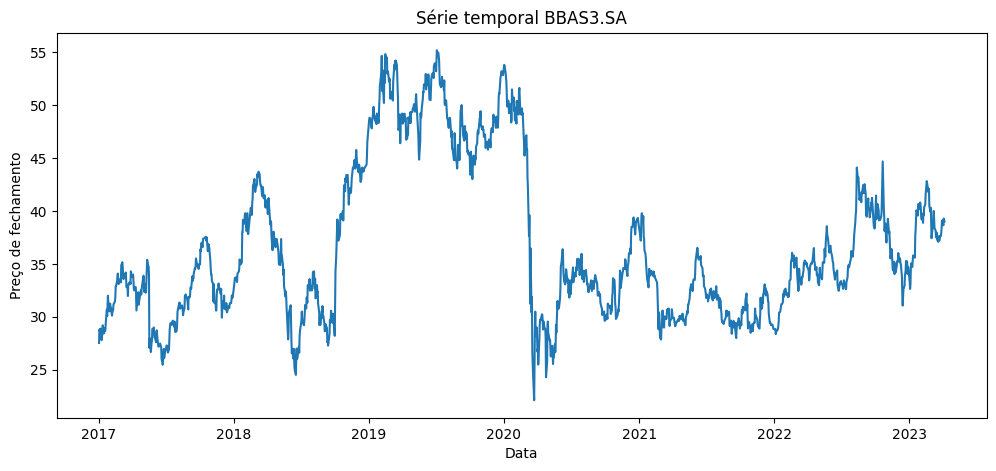

In [58]:
fig, ax = plt.subplots(figsize=(12, 5))
ax.plot(serie_temporal5)
ax.set_title('Série temporal BBAS3.SA')
ax.set_xlabel('Data')
ax.set_ylabel('Preço de fechamento')
plt.show()

Ao analisar a série temporal BBAS3.SA, é possível notar que existe uma tendência de crescimento no período de 2017 a 2021, com alguns picos e quedas ao longo do tempo. Esse comportamento pode ser indicativo de uma tendência de longo prazo, talvez relacionado ao desempenho do setor financeiro como um todo ou ao desempenho específico do Banco do Brasil.

Além disso, é possível observar um padrão sazonal na série, com flutuações periódicas que parecem ocorrer com certa regularidade ao longo do tempo. Essas flutuações podem estar relacionadas a fatores sazonais, como a sazonalidade dos fluxos financeiros ou a mudanças nas políticas do governo.

É importante ressaltar que a análise de tendência e sazonalidade é apenas um primeiro passo na análise de séries temporais e que outros fatores podem influenciar o comportamento da série, como a presença de outliers, a correlação com outras variáveis, e assim por diante. Portanto, é sempre importante fazer uma análise mais aprofundada e considerar várias abordagens para entender o comportamento da série ao longo do tempo.

Teste de hipóteses:


1.   H0: A série não é estacionária

2.   H1: A série é estacionária

Verificando se a série é estacionária:

In [59]:
result = adfuller(serie_temporal5)
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')

ADF Statistic: -2.5515610192798914
p-value: 0.10342747713514638


Como o p-valor não é menor que 0.05, é necessário diferenciar a série.

Diferenciando a série:

In [60]:
serie_temporal5_diff = serie_temporal5.diff().dropna()
result = adfuller(serie_temporal5_diff)
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')

ADF Statistic: -14.408522345988077
p-value: 8.279396987294602e-27


Assim, a série não é estacionária.

Plotar os gráficos de ACF e PACF para identificar a ordem do modelo:

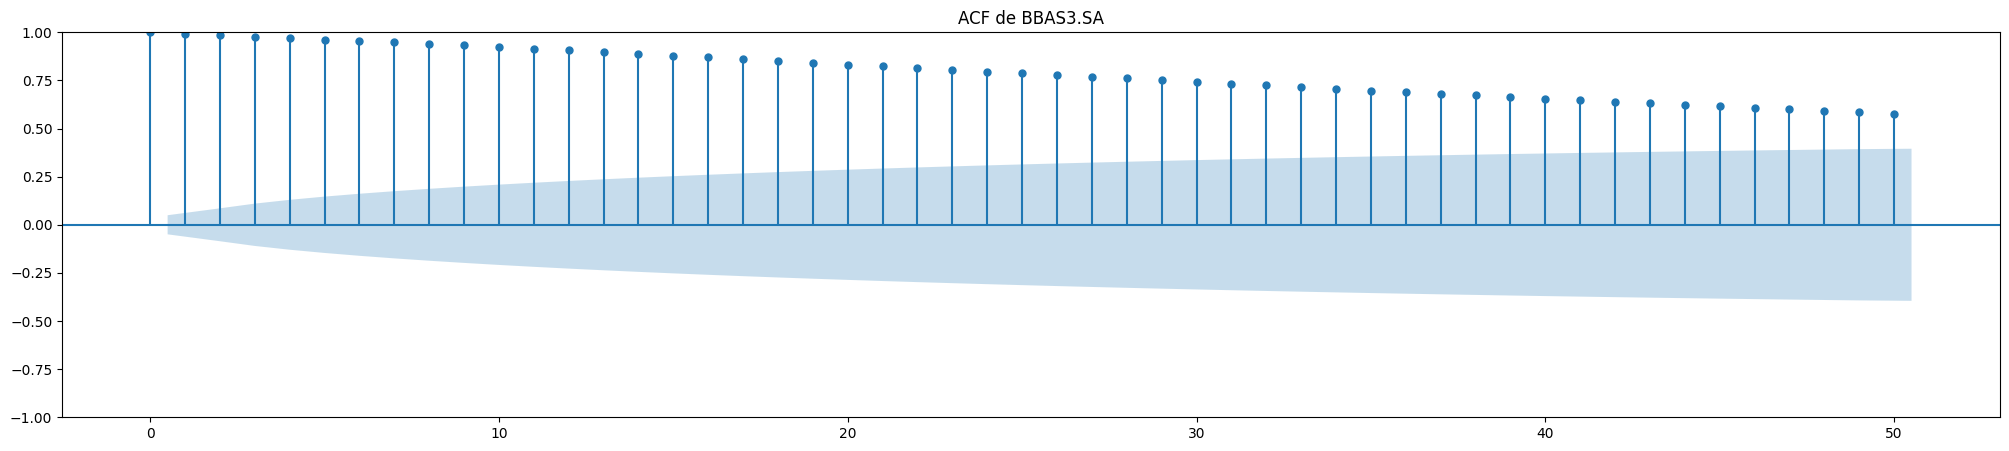

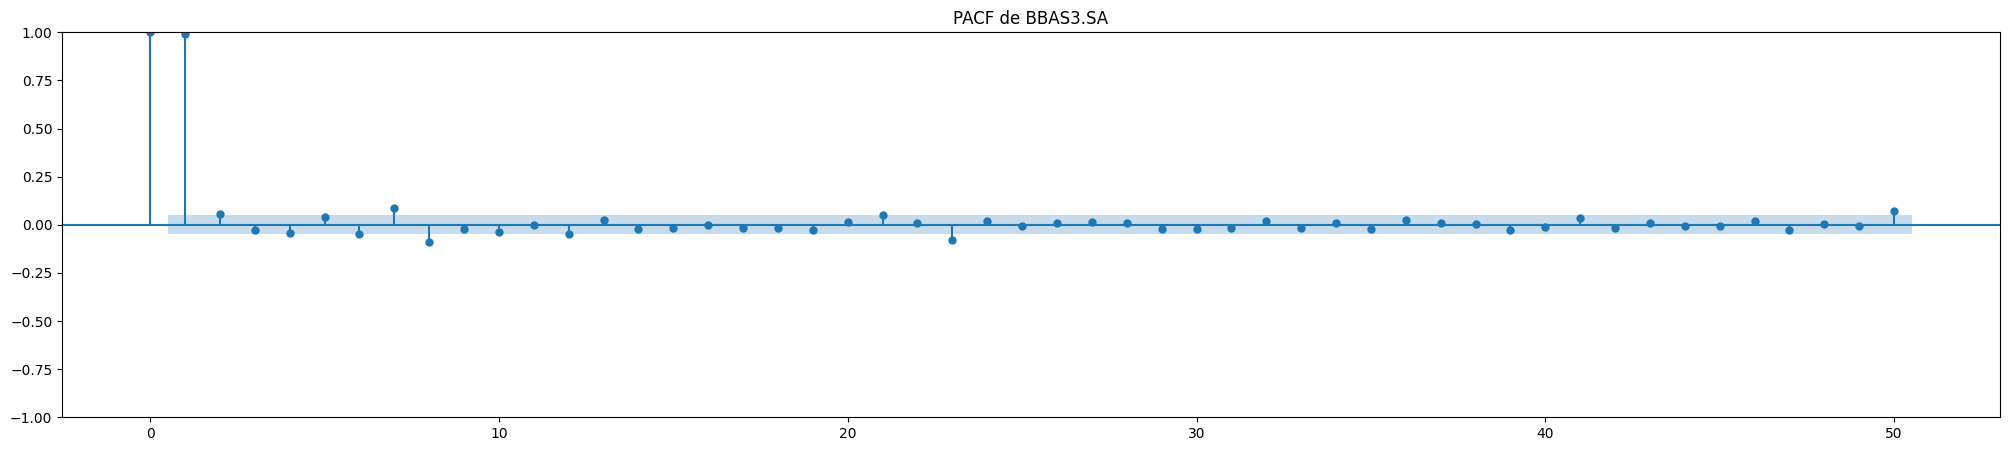

In [61]:
fig, ax = plt.subplots(figsize=(25, 5))
tsaplots.plot_acf(serie_temporal5, lags=50, ax=ax)
ax.set_title("ACF de BBAS3.SA")
plt.show()


fig, ax = plt.subplots(figsize=(25, 5))
tsaplots.plot_pacf(serie_temporal5, lags=50, ax=ax)
ax.set_title("PACF de BBAS3.SA")
plt.show()

Analisando os gráficos apresentados, é possível observar que ambos possuem alguns lags significativamente diferentes de zero, o que sugere que há autocorrelação na série. No entanto, um ACF decai rapidamente, o que indica que essa autocorrelação é bastante fraca e que a série pode ser considerada estacionária. Além disso, a PACF tem um pico significativo no lag 1, o que sugere que um modelo autorregressivo (AR) com ordem 1 pode ser adequado para modelar a série.
Assim, com base na análise da série temporal BBAS3.SA, não foi identificado um padrão claro de tendência ou sazonalidade. 

Criando um modelo de ajuste

In [62]:
# Aplicar auto.arima
modelo_auto5 = pm.auto_arima(serie_temporal4, trace=True, error_action='ignore', suppress_warnings=True, seasonal=False)
print(modelo_auto5.summary())

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=2051.103, Time=0.83 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=2045.487, Time=0.17 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=2045.260, Time=0.31 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=2045.274, Time=0.38 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=2043.526, Time=0.15 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=2047.240, Time=0.42 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 2.268 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1560
Model:               SARIMAX(0, 1, 0)   Log Likelihood               -1020.763
Date:                Mon, 10 Apr 2023   AIC                           2043.526
Time:                        11:01:12   BIC                           2048.878
Sample:                             0   HQIC                          2045.516
          

In [63]:
# Cria o modelo
modelo_ajustado5 = sm.tsa.ARIMA(serie_temporal4, order=(0, 1, 0), seasonal_order=(0, 0, 0, 0))

# Ajusta o modelo aos dados
resultado5= modelo_ajustado5.fit()

# Sumário do modelo ajustado
print(resultado5.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 1560
Model:                 ARIMA(0, 1, 0)   Log Likelihood               -1020.763
Date:                Mon, 10 Apr 2023   AIC                           2043.526
Time:                        11:01:13   BIC                           2048.878
Sample:                             0   HQIC                          2045.516
                               - 1560                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         0.2169      0.003     73.051      0.000       0.211       0.223
Ljung-Box (L1) (Q):                   2.23   Jarque-Bera (JB):              8880.05
Prob(Q):                              0.14   Pr

Teste de normalidade: O mercado de ações é complexo, portanto, o teste de normalidade pode não ser suficiente para detectar se os dados são normais.

Limitações do modelo: O modelo SARIMAX adotou leva em conta apenas as informações da ação em si e pode não ser suficiente para modelar tudo o que influencia a série. Seria ideal realizar uma análise conjunta, considerando dados macro e microeconômicos do setor da ação.

Complexidade da análise conjunta: No entanto, essa análise seria mais complicada e requereria experiência na área para combinar as informações de maneira correta.

Análise do SARIMAX: Os resultados do modelo SARIMAX mostram que foram realizadas experimentações para os parâmetros ar.L1 e ma.L1, mas os parâmetros ar.L2 e ar.L3 não foram experimentados.

Heterocedasticidade: O modelo apresenta sinais de heterocedasticidade e violação da normalidade.

Avaliar a qualidade do modelo

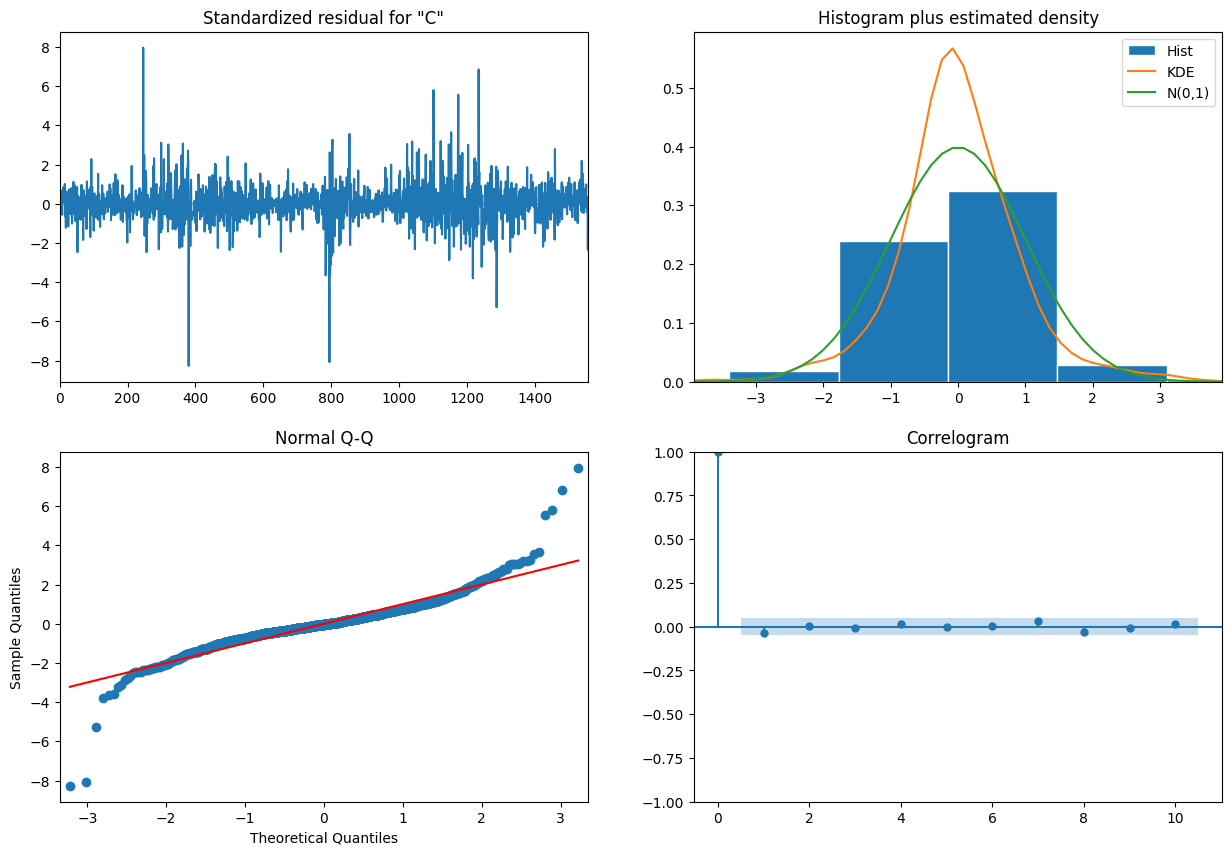

In [64]:
# Faz o plot dos diagnósticos do modelo
resultado5.plot_diagnostics(figsize=(15, 10))
plt.show()

O primeiro gráfico é o histograma dos resíduos juntamente com a densidade concebida. É importante que os resíduos sigam uma distribuição normal, o que é evidenciado por um formato de sino no histograma e pela densidade próxima à curva normal. Nesse caso, a distribuição dos resíduos parece se aproximar do normal, mas apresenta algumas assimetrias.

O segundo gráfico é um gráfico de densidade dos resíduos. Semelhante ao histograma, ele também evidencia a distribuição dos resíduos.

No terceiro gráfico, o QQ-plot (quantile-quantile plot), compara a distribuição dos resíduos com uma distribuição teórica normal e é possível observar que os resíduos apresentam algumas discrepâncias em relação à distribuição normal.

O último gráfico é o gráfico dos resíduos ao longo do tempo. É importante verificar se há algum padrão ou sazonalidade restante nos resíduos. Nesse caso, é possível observar que os resíduos parecem se distribuir aleatoriamente ao longo do tempo, sem um padrão aparente.

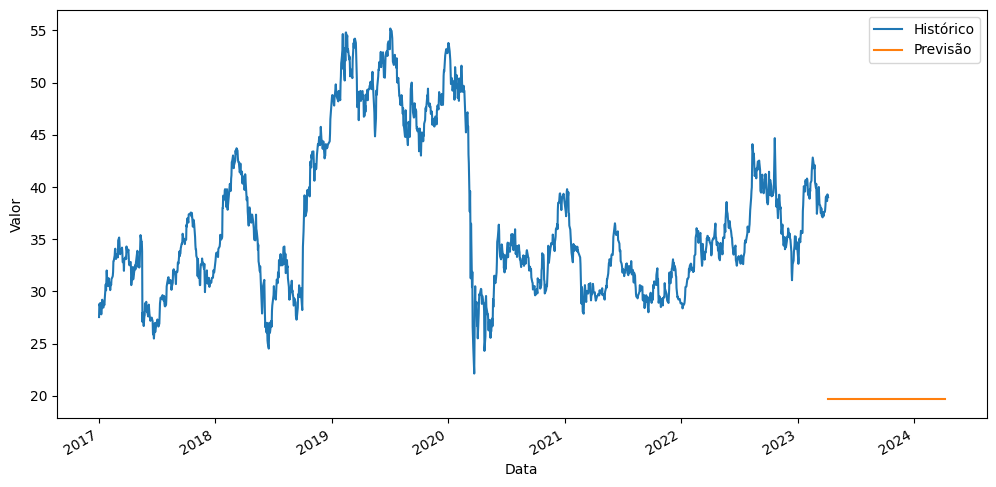

In [65]:
forecast = resultado5.forecast(steps=365)

# Obter índices para os períodos previstos
forecast_index = pd.date_range(serie_temporal5.index[-1], periods=366, freq=serie_temporal5.index.inferred_freq)[1:]

# Plotar previsões junto com dados históricos
fig, ax = plt.subplots(figsize=(12, 6))
serie_temporal5.plot(ax=ax, label='Histórico')
ax.plot(forecast_index, forecast, label='Previsão')
ax.set_xlabel('Data')
ax.set_ylabel('Valor')
ax.legend()
plt.show()

# Removendo os outliers das séries
###### No contexto do mercado de ações, a ocorrência de valores extremos, também conhecidos como outliers, é uma situação esperada. Tais ocorrências podem surgir de eventos imprevisíveis, como a recente pandemia global, que levou a uma queda abrupta no valor de diversas ações. Outliers também podem ser gerados em cenários nos quais há um grande volume de especulação em torno de uma determinada empresa, sendo que se as expectativas não forem fundamentadas, o preço da ação pode cair para um valor que melhor represente o seu valor "verdadeiro". Portanto, a escolha de manter ou retirar os outliers é difícil, pois os outliers são relevantes para análise financeira.

###### De qualquer maneira, abaixo foi realizado a remoção dos outliers, e os resultados das análises e modelos preditivos não sofreram grandes mudanças após a remoção dos outliers.

In [67]:
# Deletando os outliers

def drop_outliers(df):
   q1=df.quantile(0.25)
   q3=df.quantile(0.75)
   IQR=q3-q1
   not_outliers = df[~((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]
   outliers_dropped = not_outliers.dropna(subset=['Close'])
   return outliers_dropped
amer3_clean = drop_outliers(stocks_amer3)
amer3_clean

# Visualizando os outliers

def get_outliers(df):
   q1=df.quantile(0.25)
   q3=df.quantile(0.75)
   IQR=q3-q1
   outliers = df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]
   return outliers

outliers = get_outliers(stocks_amer3['Close'])
print('Número de outliers: '+ str(len(outliers)))
print('Maior outlier: '+ str(outliers.max()))
print('Menor outlier: '+ str(outliers.min()))
print('')

outliers

Número de outliers: 41
Maior outlier: 126.0
Menor outlier: 111.0



Date
2020-07-01    111.642532
2020-07-06    117.851540
2020-07-07    116.705421
2020-07-08    115.021111
2020-07-09    119.775040
2020-07-10    119.834839
2020-07-13    116.605759
2020-07-14    115.300171
2020-07-15    113.605896
2020-07-17    115.090874
2020-07-20    119.236862
2020-07-21    118.828239
2020-07-22    125.126945
2020-07-23    119.595650
2020-07-24    121.180290
2020-07-27    120.500000
2020-07-28    121.830002
2020-07-29    123.410004
2020-07-30    122.000000
2020-07-31    119.320000
2020-08-03    126.000000
2020-08-04    122.989998
2020-08-05    121.500000
2020-08-06    123.010002
2020-08-07    121.669998
2020-08-10    121.779999
2020-08-11    120.000000
2020-08-12    120.260002
2020-08-13    122.000000
2020-08-14    113.599998
2020-08-18    114.400002
2020-08-19    112.389999
2020-08-20    112.809998
2020-08-21    115.769997
2020-08-24    115.139999
2020-08-25    114.330002
2020-08-26    111.000000
2020-08-27    111.230003
2020-08-28    115.559998
2020-08-31    112.08

# Americanas

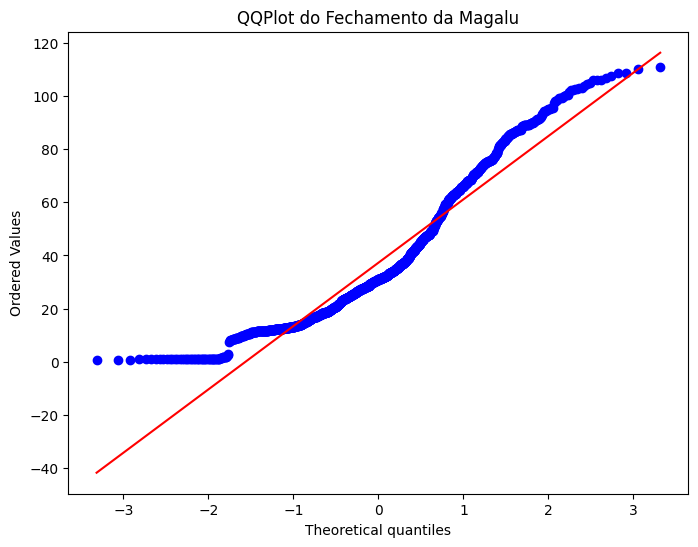

In [68]:
# Dados sem outliers
amer3_clean = drop_outliers(stocks_amer3)

from scipy import stats
# Plot do qqplot
fig, ax = plt.subplots(figsize=(8, 6))
stats.probplot(amer3_clean['Close'], plot=ax)
ax.set_title('QQPlot do Fechamento da Magalu')
plt.show()

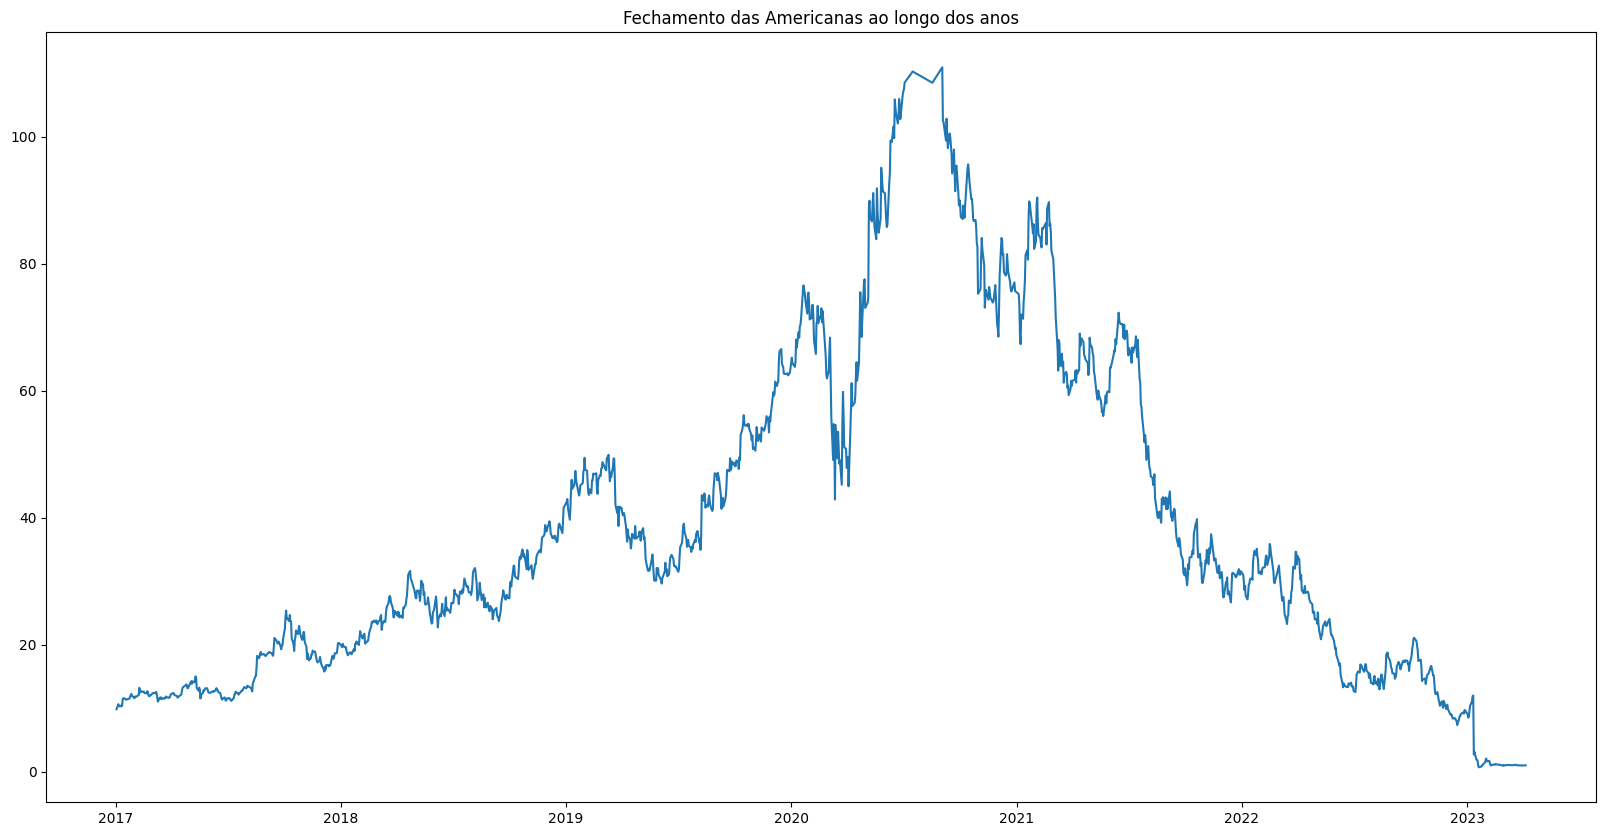

In [69]:
# Gráfico de fechamento de preços sem outliers
plt.figure(figsize=(20, 10))
plt.plot(amer3_clean['Close'])
plt.title('Fechamento das Americanas ao longo dos anos')
plt.show()

# Magalu

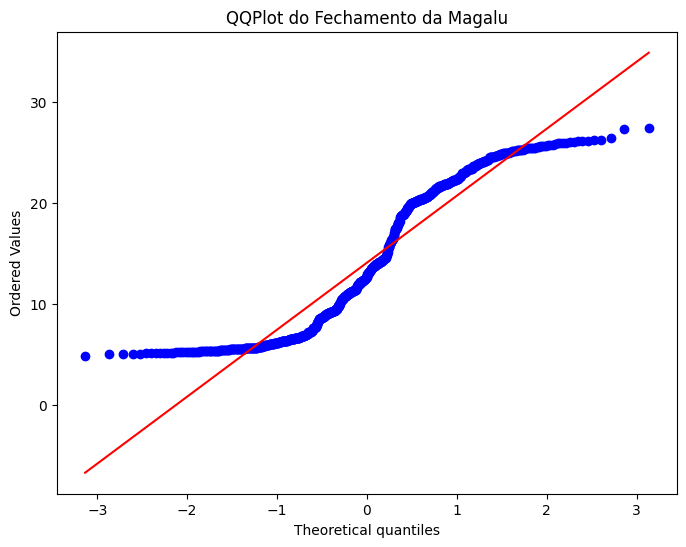

In [ ]:
# Dados sem outliers
mglu3_clean = drop_outliers(stocks_mglu3)

from scipy import stats
# Plot do qqplot
fig, ax = plt.subplots(figsize=(8, 6))
stats.probplot(mglu3_clean['Close'], plot=ax)
ax.set_title('QQPlot do Fechamento da Magalu')
plt.show()

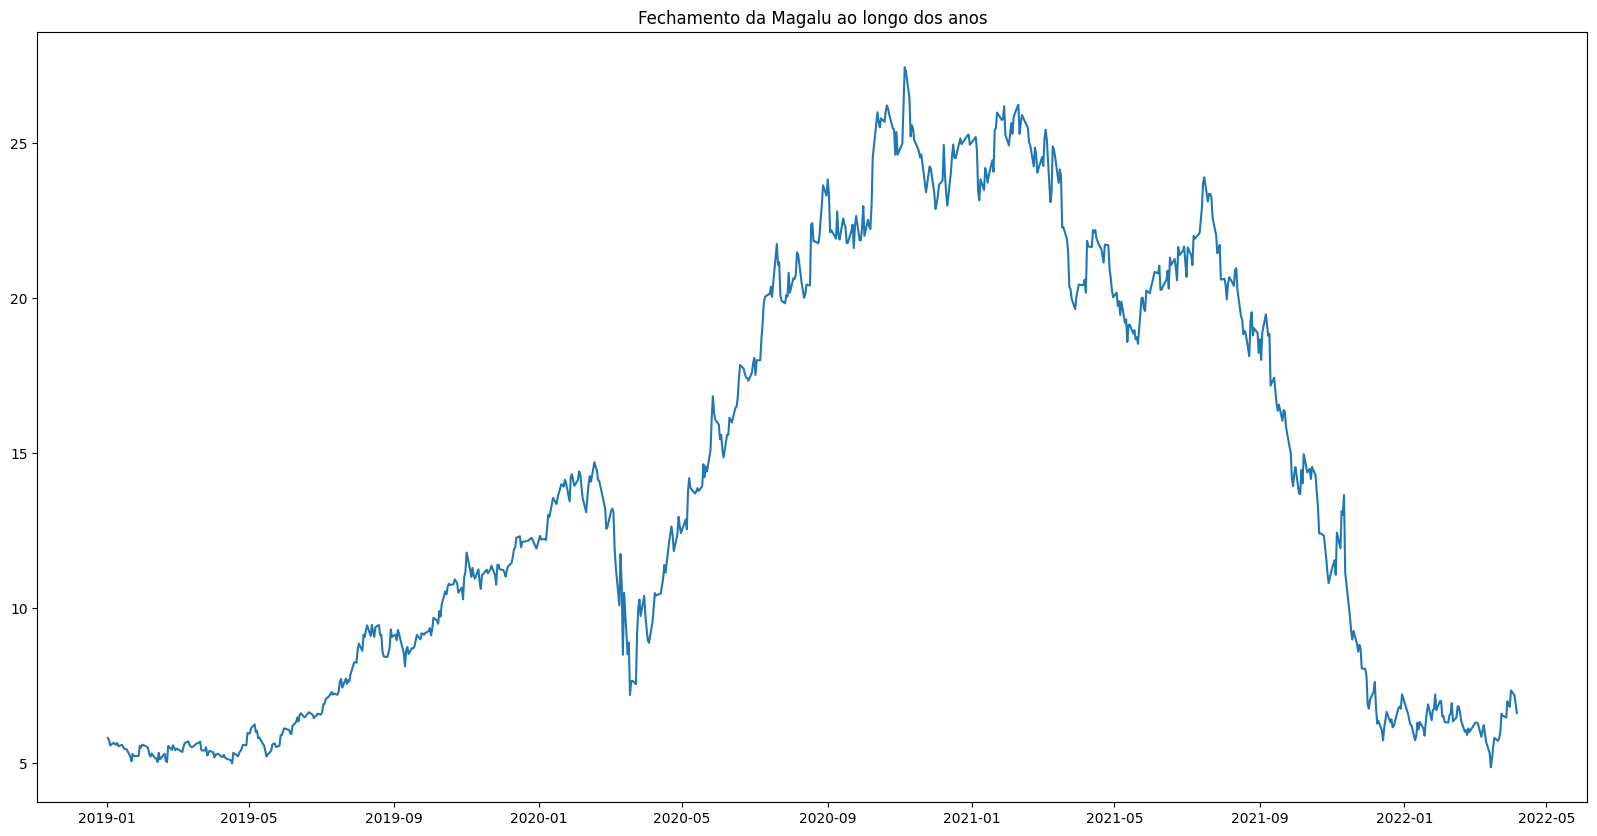

In [ ]:
# Gráfico de fechamento de preços sem outliers
plt.figure(figsize=(20, 10))
plt.plot(mglu3_clean['Close'])
plt.title('Fechamento da Magalu ao longo dos anos')
plt.show()

#Itau

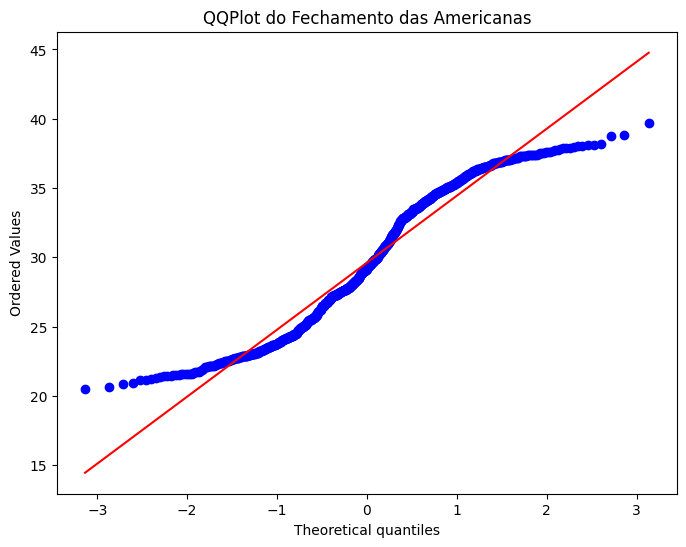

In [ ]:
# Dados sem outliers
itub4_clean = drop_outliers(stocks_itub4)

from scipy import stats
# Plot do qqplot
fig, ax = plt.subplots(figsize=(8, 6))
stats.probplot(itub4_clean['Close'], plot=ax)
ax.set_title('QQPlot do Fechamento do Itau')
plt.show()

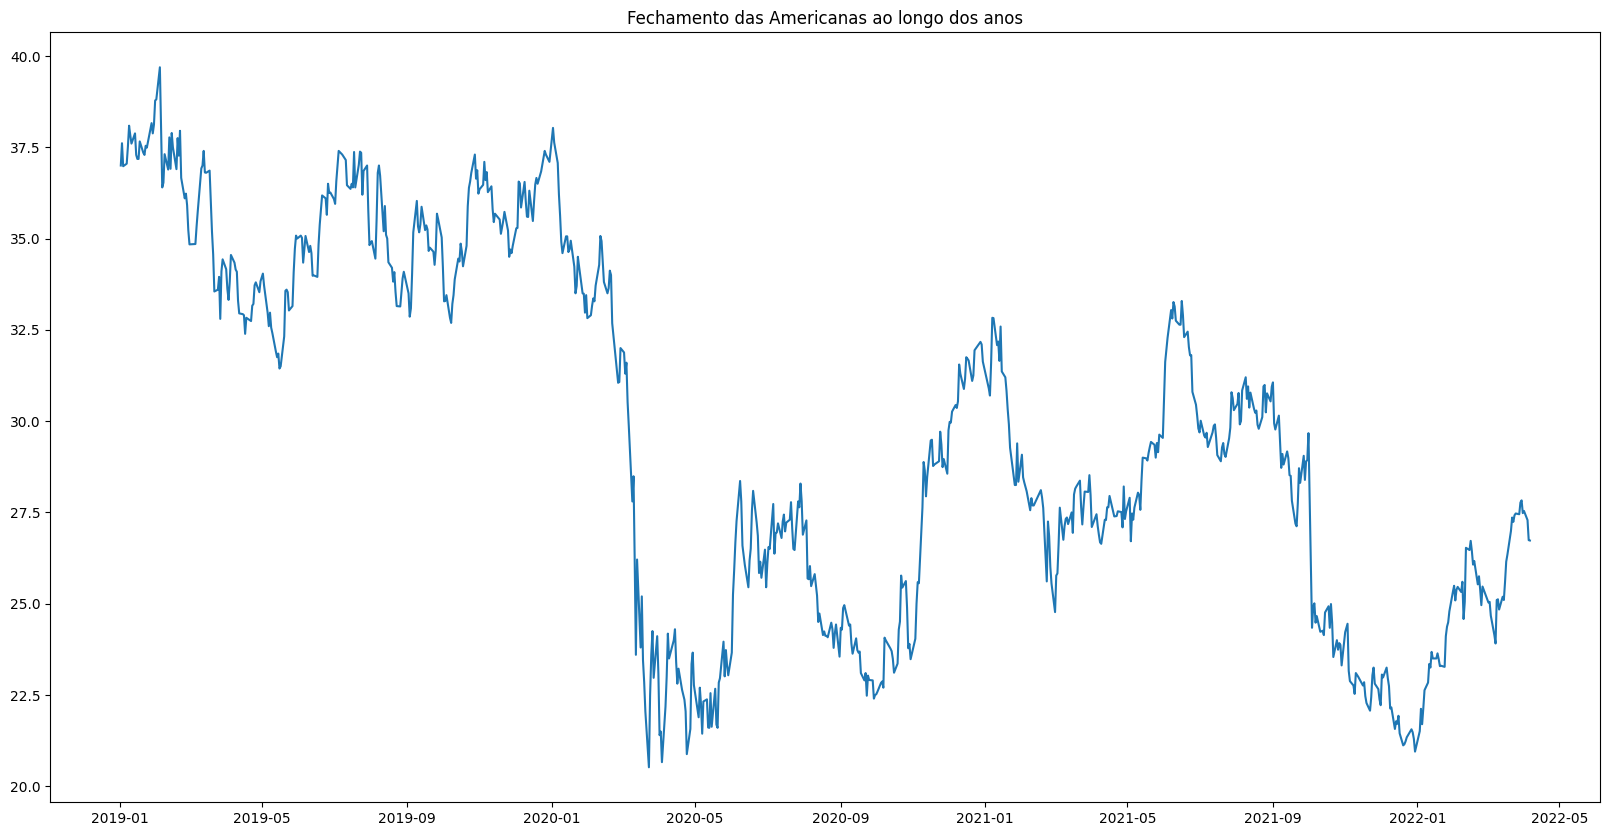

In [ ]:
# Gráfico de fechamento de preços sem outliers
plt.figure(figsize=(20, 10))
plt.plot(itub4_clean['Close'])
plt.title('Fechamento do Itau ao longo dos anos')
plt.show()

# Embraer

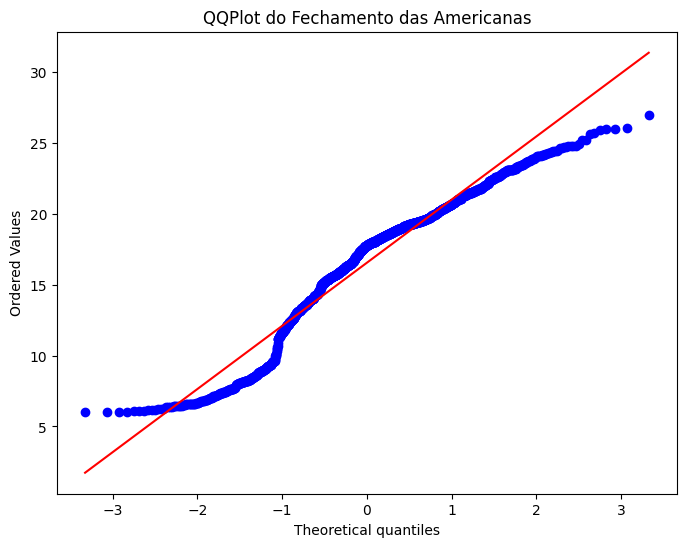

In [ ]:
# Dados sem outliers
embr3_clean = drop_outliers(stocks_embr3)

from scipy import stats
# Plot do qqplot
fig, ax = plt.subplots(figsize=(8, 6))
stats.probplot(embr3_clean['Close'], plot=ax)
ax.set_title('QQPlot do Fechamento da Embraer')
plt.show()

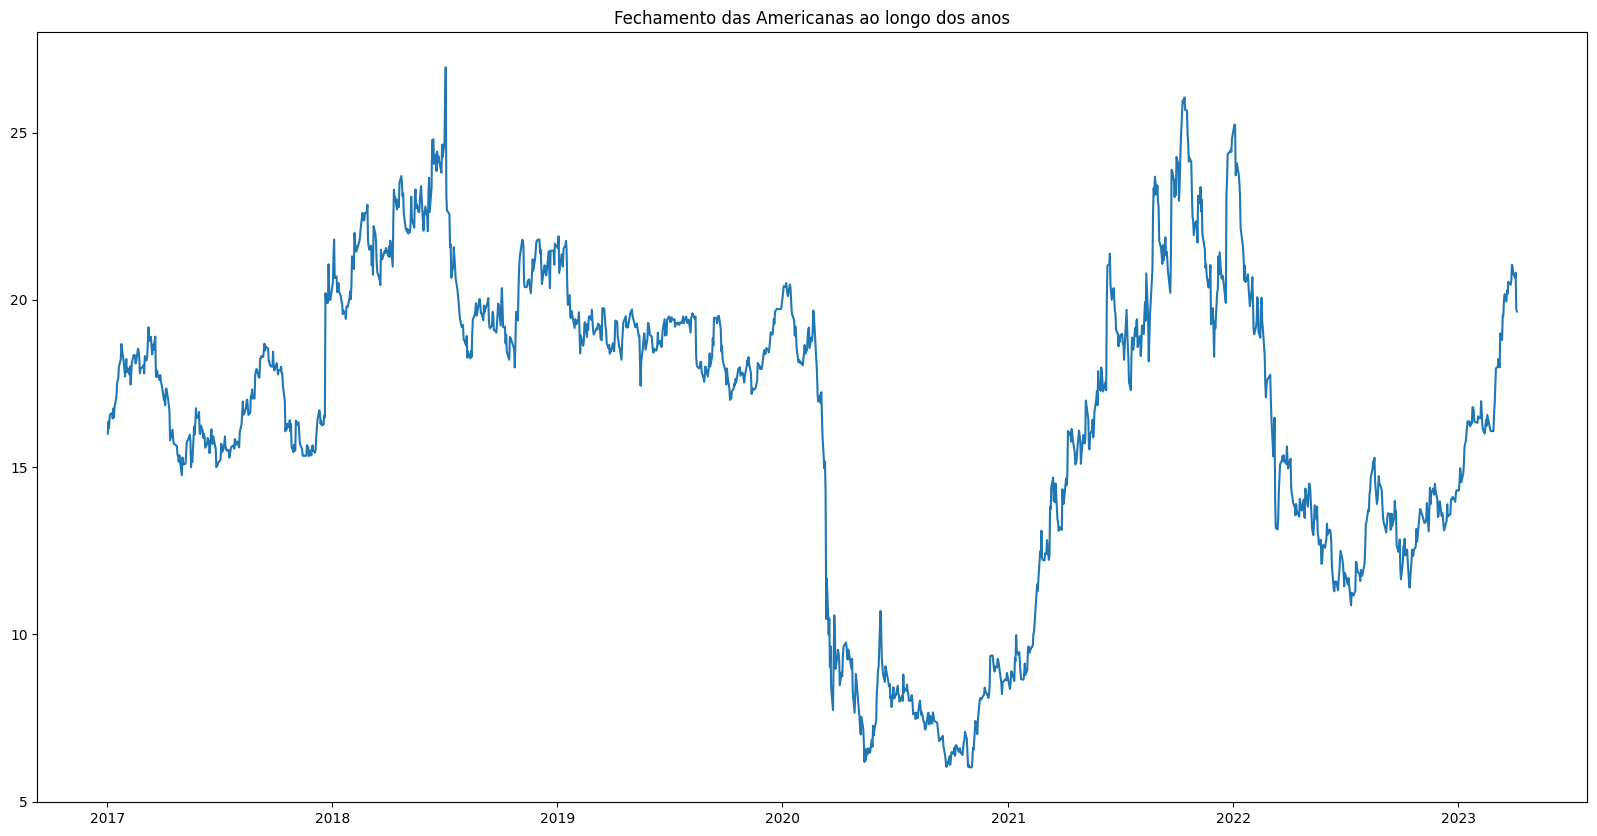

In [ ]:
# Gráfico de fechamento de preços sem outliers
plt.figure(figsize=(20, 10))
plt.plot(embr3_clean['Close'])
plt.title('Fechamento da Embraer ao longo dos anos')
plt.show()

# Banco do Brasil

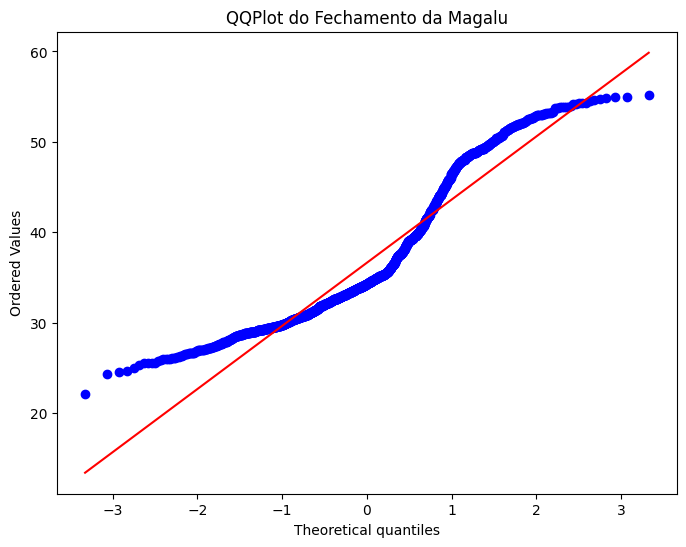

In [ ]:
# Dados sem outliers
bbas3_clean = drop_outliers(stocks_bbas3)

from scipy import stats
# Plot do qqplot
fig, ax = plt.subplots(figsize=(8, 6))
stats.probplot(bbas3_clean['Close'], plot=ax)
ax.set_title('QQPlot do Fechamento da Magalu')
plt.show()

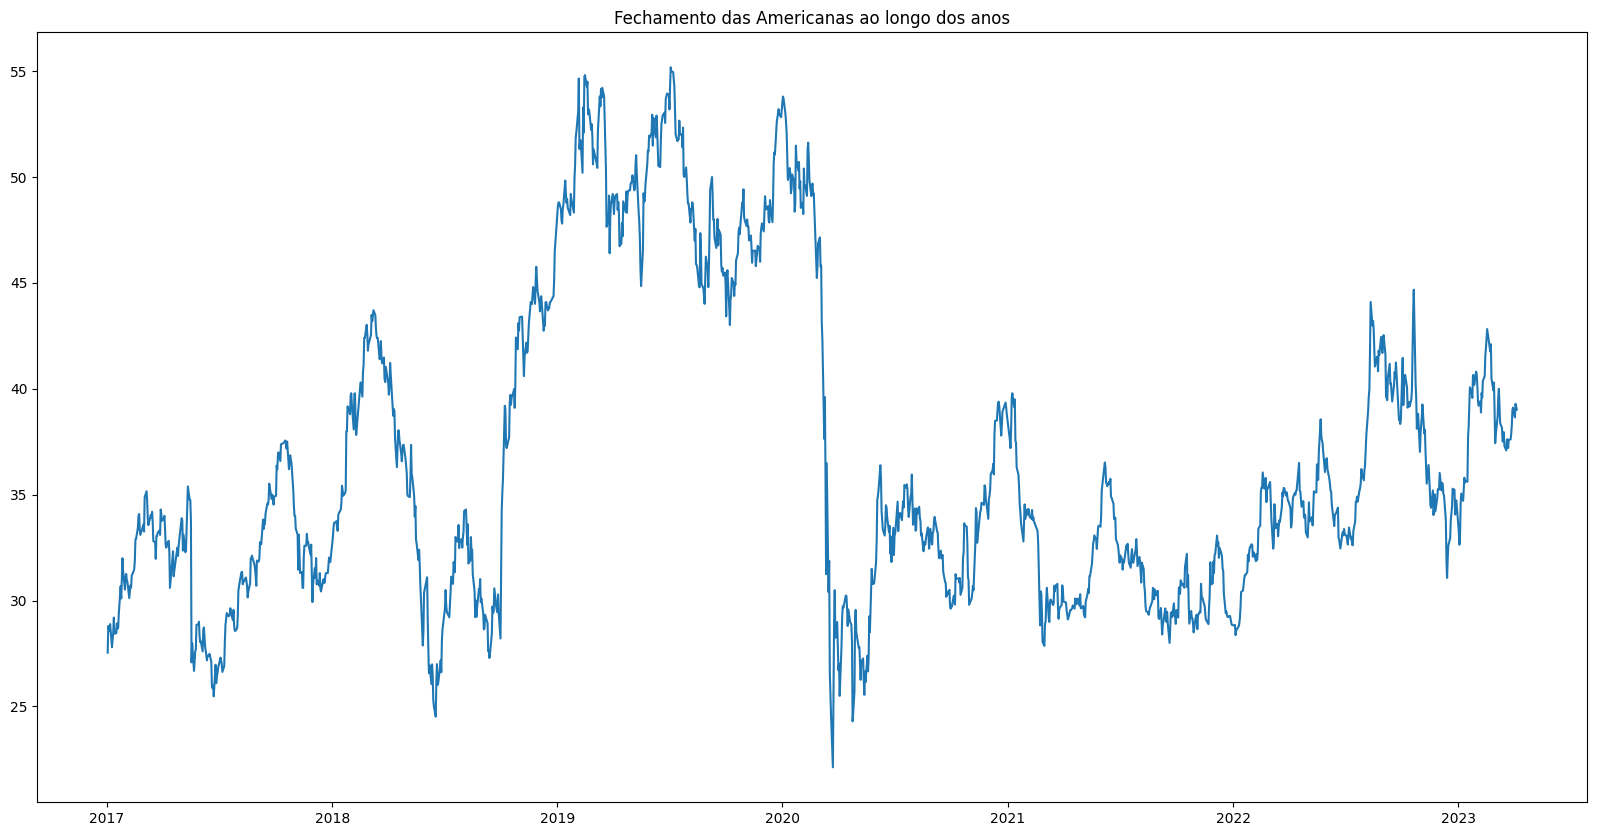

In [ ]:
# Gráfico de fechamento de preços sem outliers
plt.figure(figsize=(20, 10))
plt.plot(bbas3_clean['Close'])
plt.title('Fechamento das Americanas ao longo dos anos')
plt.show()


> **Conclusões**

Conclui-se que o mercado financeiro é um ambiente complexo e dinâmico, especialmente em nações com instabilidades econômicas e políticas, no qual muitos fatores estão fora do escopo dos modelos analíticos, como o utilizado neste estudo. Os modelos de séries temporais são limitados em sua capacidade de levar em conta todas as variáveis ​​e fatores que podem afetar o comportamento dos ativos financeiros. Uma previsão mais precisa exigiria uma integração mais ampla de dados econômicos, além de outras questões que afetam as empresas.

